<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="https://materials.campus.uoc.edu/cdocent/common/img/logo-uoc.png" align="left">
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">Automatización de la Selección de Visualizaciones de Datos para la Alfabetización de Datos - Visualización Interactiva Mockup</p>
<p style="margin: 0; text-align:right;">2024-2 · Máster universitario en Ciencia de datos (Data science)</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Estudios de Informática, Multimedia y Telecomunicación
</p>
<p>
    </p>
<p>
    </p>
<p>
    </p>
</div>
</div>
<div style="width:100%;">&nbsp;</div>

 <ol start="1">
  <li>Carga de un conjunto de datos</li>
    <li>Preprocesado de los datos</li>
  <li>Análisis de los datos
  <br>2.1 Análisis estadístico básico
  <br>2.2 Análisis exploratorio de los datos
  
</ol>
   


<div class="alert alert-block alert-info">
<strong>Nombre y apellidos: Inmaculada Pizarro Moreno</strong>
</div>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn import preprocessing
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler, TomekLinks, EditedNearestNeighbours

import matplotlib
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
seed = 100

%matplotlib inline

# 1. Carga del conjunto de datos

Se eligieron varios datasets de Eurostat sobre migración y población.  En particular se han utilizado las bases de datos:

<li>Immigration by age group, sex and country of birth (migr_imm3ctb). Proporciona datos sobre los flujos internacionales de inmigración según varias clasificaciones, como edad, sexo, país de nacimiento.</li>
<li>Emigration by age group, sex and country of birth (migr_emi4ctb). Proporciona datos sobre los flujos internacionales de emigración según varias clasificaciones, como edad, sexo, país de nacimiento, país de ciudadanía.</li>
<li>Population change - Demographic balance and crude rates at national level (demo_gind)</li>

Las dos primeras bases de datos se obtuvieron del siguiente URL:
https://ec.europa.eu/eurostat/web/migration-asylum/international-migration-citizenship/database
La base de datos de población se obtuve de esta otra URL:
https://ec.europa.eu/eurostat/databrowser/view/demo_gind/default/table?lang=en


In [2]:
import os
import pandas as pd

# Especificar la carpeta donde están los archivos
carpeta = r"C:\Users\34617\Documents\MASTER_DATA_SCIENCE\TFM\visualizacion interactiva\FINAL"

# Leer los archivos Excel
countrycodes = pd.read_excel(os.path.join(carpeta, "Country_codes_regions2.xlsx"))
countrybirthcodes = pd.read_excel(os.path.join(carpeta, "Country_codes_regions_birth2.xlsx"))
inmigration = pd.read_excel(os.path.join(carpeta, "Inmigrations.xlsx"))
emigration = pd.read_excel(os.path.join(carpeta, "Emigrations.xlsx"))
population = pd.read_excel(os.path.join(carpeta, "Population_indicators.xlsx"))


In [3]:
# Mostrar los DataFrames para verificar que se cargaron correctamente
print(countrycodes.describe(include='all'))
print(countrybirthcodes.describe(include='all'))
print(inmigration.describe(include='all'))
print(emigration.describe(include='all'))
print(population.describe(include='all'))
#print(countrycodes.head())
#print(countrybirthcodes.head())
#print(inmigration.head())
#print(emigration.head())
#print(population.head())


       reporting_country reporting_country_name reporting_country_region  \
count                285                    286                      286   
unique               284                    281                       12   
top                   TW                  Other                   Africa   
freq                   2                      2                       66   

       reporting_country_sub-region  
count                           286  
unique                           41  
top              Sub-Saharan Africa  
freq                             53  
       country_birth country_birth_name country_birth_region  \
count            285                286                  286   
unique           284                281                   12   
top               TW              Other               Africa   
freq               2                  2                   66   

       country_birth_sub-region  
count                       286  
unique                       41  
top   

In [3]:
#verifico si hay valores nulos en los datasets importados de eurostar

nulos = inmigration.isna().any().any()  

if nulos:
    print("Algunos valores en el dataset inmigración son nulos")
    # Mostrar las columnas que contienen valores nulos
    columnas_con_nulos = inmigration.columns[inmigration.isna().any()]
    print("Columnas con valores nulos en inmig:", columnas_con_nulos)
else:
    print("Ningun valor en el dataset inmigración son nulos")
    

nulos = emigration.isna().any().any()  

if nulos:
    print("Algunos valores en el dataset emigracion son nulos")
    # Mostrar las columnas que contienen valores nulos
    columnas_con_nulos = emigration.columns[emigration.isna().any()]
    print("Columnas con valores nulos en emig:", columnas_con_nulos)

else:
    print("Ningun valor en el dataset emigracion son nulos")

nulos = population.isna().any().any()  

if nulos:
    print("Algunos valores en el dataset population son nulos")
    # Mostrar las columnas que contienen valores nulos
    columnas_con_nulos = population.columns[population.isna().any()]
    print("Columnas con valores nulos en pp:", columnas_con_nulos)

else:
    print("Ningun valor en el dataset population son nulos")
   


Algunos valores en el dataset inmigración son nulos
Columnas con valores nulos en inmig: Index(['country_birth'], dtype='object')
Algunos valores en el dataset emigracion son nulos
Columnas con valores nulos en emig: Index(['country_birth'], dtype='object')
Algunos valores en el dataset population son nulos
Columnas con valores nulos en pp: Index(['AVG_TOTAL_POPULATION', 'DEATH', 'FEMENINE_JAN'], dtype='object')


In [4]:
# si hay nulos remplazo por UNKNOWN pero en population por 0

# Reemplazo valores nulos en country birth por UNKNOWN y vuelvo a comprobar
conteo_nulos = inmigration['country_birth'].isna().sum()
print(f"Cantidad de valores nulos en inmigration 'country_birth': {conteo_nulos}")
#print(conteos_columna)
columnas_a_reemplazar = ['country_birth']  # Lista de columnas que deseas modificar
inmigration[columnas_a_reemplazar] = inmigration[columnas_a_reemplazar].fillna('UNK')
conteo_nulos = inmigration['country_birth'].isna().sum()
print(f"Cantidad de valores nulos en 'country_birth': {conteo_nulos}")
 

# Reemplazo valores nulos en country birth por UNKNOWN y vuelvo a comprobar
#conteos_columna = emigration['country_birth'].value_counts(dropna=False)
conteo_nulos = emigration['country_birth'].isna().sum()
print(f"Cantidad de valores nulos en 'country_birth': {conteo_nulos}")
#print(conteos_columna)
columnas_a_reemplazar = ['country_birth']  # Lista de columnas que deseas modificar
emigration[columnas_a_reemplazar] = emigration[columnas_a_reemplazar].fillna('UNK')
conteo_nulos = emigration['country_birth'].isna().sum()
print(f"Cantidad de valores nulos en 'country_birth' tras remplazo: {conteo_nulos}")
#conteos_columna = emigration['country_birth'].value_counts(dropna=False)
#print(conteos_columna)  

# Contar valores nulos en las columnas 'AVG_TOTAL_POPULATION', 'DEATH', 'FEMENINE_JAN'
conteo_nulos = population[['AVG_TOTAL_POPULATION', 'DEATH', 'FEMENINE_JAN']].isna().sum()
print(f"Cantidad de valores nulos antes del reemplazo:\n{conteo_nulos}")

# Reemplazar valores nulos en las columnas especificadas por 0
columnas_a_reemplazar = ['AVG_TOTAL_POPULATION', 'DEATH', 'FEMENINE_JAN']
population[columnas_a_reemplazar] = population[columnas_a_reemplazar].fillna(0)

# Contar valores nulos en las columnas 'AVG_TOTAL_POPULATION', 'DEATH', 'FEMENINE_JAN'
conteo_nulos = population[['AVG_TOTAL_POPULATION', 'DEATH', 'FEMENINE_JAN']].isna().sum()
print(f"Cantidad de valores nulos después del reemplazo:\n{conteo_nulos}")

Cantidad de valores nulos en inmigration 'country_birth': 2840
Cantidad de valores nulos en 'country_birth': 0
Cantidad de valores nulos en 'country_birth': 1768
Cantidad de valores nulos en 'country_birth' tras remplazo: 0
Cantidad de valores nulos antes del reemplazo:
AVG_TOTAL_POPULATION    50
DEATH                   50
FEMENINE_JAN            30
dtype: int64
Cantidad de valores nulos después del reemplazo:
AVG_TOTAL_POPULATION    0
DEATH                   0
FEMENINE_JAN            0
dtype: int64


In [12]:
# Convertir la columna "Year" a entero en ambos DataFrames
inmigration["Year"] = inmigration["Year"].astype(int)
emigration["Year"] = emigration["Year"].astype(int)

inmigration = inmigration.drop(columns=["freq", "agedef", "unit","conteo_nulos"], errors="ignore")
emigration = emigration.drop(columns=["freq", "agedef", "unit","conteo_nulos"], errors="ignore")

inmigration = inmigration.drop_duplicates()
emigration = emigration.drop_duplicates()

# Paso 1: Uno inmigration con population y seleccionar columnas - en este caso nos interesa linkar por pais de nacimiento al estudiar las inmigraciones 
# en relacion a la seguridad y poblacion del pais del que vienen (se ha tomado el pais de nacimiento como el de origen)
merged_data_inmi = (
    inmigration
    .merge(population, on=["Year", "reporting_country"], how="inner")
)


# Elimino la columna 'reporting_country_y'  (que proviene de population_i)
#merged_data_inmi = merged_data_inmi.drop(columns=["reporting_country_y"])

# Asegurarse de que 'reporting_country_x' tenga el nombre correcto
#merged_data_inmi = merged_data_inmi.rename(columns={"reporting_country_x": "reporting_country"})

# Paso 2: uno con los países, regiones etc..
merged_data_inmi = (
    merged_data_inmi
    .merge(countrycodes, on="reporting_country", how="left")
    .merge(countrybirthcodes, on="country_birth", how="left")
)

# Paso 3: Repetp el proceso para "emigration" pero linkar por el pais que reporta para ver la poblacion y muertes del pais de emigracion
merged_data_emig = (
    emigration
    .merge(population, on=["Year", "reporting_country"], how="inner")
)

# Elimino la columna 'country_birth_y'  (que proviene de population_e)
#merged_data_emig = merged_data_emig.drop(columns=["country_birth_y"])

# Asegurarse de que 'country_birth_x' tenga el nombre correcto
#merged_data_emig = merged_data_emig.rename(columns={"country_birth_x": "country_birth"})

merged_data_emig = (
    merged_data_emig
    .merge(countrycodes, on="reporting_country", how="left")
    .merge(countrybirthcodes, on="country_birth", how="left")
)


In [13]:
print(merged_data_inmi.columns)
print(merged_data_emig.columns)
# Poner todas las columnas en minusculas
merged_data_inmi.columns = merged_data_inmi.columns.str.lower()
# Poner todas las columnas en minusculas
merged_data_emig.columns = merged_data_emig.columns.str.lower()
#print(merged_data_inmi.columns)
#print(merged_data_emig.columns)
# orden
column_order_i = ['year','age', 'sex', 
                  'reporting_country', 'reporting_country_name', 'reporting_country_region','reporting_country_sub-region', 
                  'country_birth', 'country_birth_name', 'country_birth_region', 'country_birth_sub-region',
                   'inmigrations', 'avg_total_population', 'death', 'femenine_jan','jan' ]
column_order_e = ['year','age', 'sex',
                   'reporting_country', 'reporting_country_name', 'reporting_country_region','reporting_country_sub-region', 
                  'country_birth','country_birth_name','country_birth_region', 'country_birth_sub-region',
                   'emigrations', 'avg_total_population', 'death', 'femenine_jan','jan']
# Reordenar las columnas
merged_data_inmi = merged_data_inmi[column_order_i]
# Reordenar las columnas
merged_data_emig = merged_data_emig[column_order_e]
print(merged_data_inmi.describe(include='all'))
print(merged_data_emig.describe(include='all'))


Index(['age', 'country_birth', 'sex', 'reporting_country', 'Year',
       'Inmigrations', 'freq', 'AVG_TOTAL_POPULATION', 'DEATH', 'FEMENINE_JAN',
       'JAN', 'reporting_country_name', 'reporting_country_region',
       'reporting_country_sub-region', 'country_birth_name',
       'country_birth_region', 'country_birth_sub-region'],
      dtype='object')
Index(['age', 'country_birth', 'sex', 'reporting_country', 'Year',
       'Emigrations', 'freq', 'AVG_TOTAL_POPULATION', 'DEATH', 'FEMENINE_JAN',
       'JAN', 'reporting_country_name', 'reporting_country_region',
       'reporting_country_sub-region', 'country_birth_name',
       'country_birth_region', 'country_birth_sub-region'],
      dtype='object')
                 year     age     sex reporting_country  \
count   712923.000000  712923  712923            712923   
unique            NaN      27       3                27   
top               NaN   TOTAL       T                HR   
freq              NaN   49986  241902            

In [14]:
numerical_i = ['inmigrations', 'avg_total_population', 'death', 'femenine_jan','jan' ]
numerical_e = ['emigrations', 'avg_total_population', 'death', 'femenine_jan','jan' ]

categorical = ['year','age', 'sex',
                   'reporting_country', 'reporting_country_name', 'reporting_country_region','reporting_country_sub-region', 
                  'country_birth','country_birth_name','country_birth_region', 'country_birth_sub-region']

# convierto las columnas numéricas a tipo numérico
for i in numerical_i:
    merged_data_inmi[i] = pd.to_numeric(merged_data_inmi[i], errors='coerce')

for i in numerical_e:
    merged_data_emig[i] = pd.to_numeric(merged_data_emig[i], errors='coerce')

# convierto las categoricas a category
for i in categorical:
    merged_data_inmi[i] = merged_data_inmi[i].astype('category')
    merged_data_emig[i] = merged_data_emig[i].astype('category')

In [15]:
#numero de filas y atributos
print("Shape of data (número de filas y atributos):", merged_data_inmi.shape , "\n")

print("Shape of data (número de filas y atributos):", merged_data_emig.shape , "\n")

#verifico si hay valores nulos
# Verificar si todas las columnas tienen valores nulos
nulos = merged_data_inmi.isna().any().any()  # Usa .all() dos veces

if nulos:
    print("Algunos valores en el dataset inmigración son nulos")
    # Mostrar las columnas que contienen valores nulos
    columnas_con_nulos = merged_data_inmi.columns[merged_data_inmi.isna().any()]
    print("Columnas con valores nulos en inmig:", columnas_con_nulos)
else:
    print("Ningun valor en el dataset inmigración son nulos")
    

nulos = merged_data_emig.isna().any().any()  # Usa .all() dos veces

if nulos:
    print("Algunos valores en el dataset emigracion son nulos")
    # Mostrar las columnas que contienen valores nulos
    columnas_con_nulos = merged_data_emig.columns[merged_data_emig.isna().any()]
    print("Columnas con valores nulos en emig:", columnas_con_nulos)

else:
    print("Ningun valor en el dataset emigracion son nulos")

    


Shape of data (número de filas y atributos): (712923, 16) 

Shape of data (número de filas y atributos): (408528, 16) 

Ningun valor en el dataset inmigración son nulos
Ningun valor en el dataset emigracion son nulos


Tenemos 251 países de nacimiento de 12 regiones en la inmigración internacional a 27 países europeos.
En la emigración son 249 países también de 12 regiones y 13 países europeos reportando.

In [16]:
# Guardar los DataFrames combinados en archivos Excel para poder usarlos en otros sistemas de visualizacion
merged_data_inmi.to_excel(os.path.join(carpeta, "Population_inmigration_indicators.xlsx"), index=False)
merged_data_emig.to_excel(os.path.join(carpeta, "Population_emigration_indicators.xlsx"), index=False)


# 2. Análisis de los datos

## 2.1 Análisis estadístico básico

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<ul>
  <li>Variables categóricas:</li>
     <ul>
      <li>Calculo la frecuencia.</li>
      <li>Creo un gráfico de barras.</li>
    </ul>
  <li>Variables numéricas:</li>
    <ul>
      <li>Calculo estadísticos descriptivos básicos: media, mediana, desviación estandard, ...</li>
      <li>Visualización distribucion</li>
    </ul>
</ul>
</div>

In [17]:
#creamos variables con los nombres de las variables categóricas y numéricas para inmigracion
tipos_de_datos_i = merged_data_inmi.dtypes
variables_categoricas_i = tipos_de_datos_i[tipos_de_datos_i == 'category'].index
variables_numericas_i = tipos_de_datos_i[tipos_de_datos_i != 'category'].index

#creamos variables con los nombres de las variables categóricas y numéricas para emigracion
tipos_de_datos_e = merged_data_emig.dtypes
variables_categoricas_e = tipos_de_datos_e[tipos_de_datos_e == 'category'].index
variables_numericas_e = tipos_de_datos_e[tipos_de_datos_e != 'category'].index

print('Categoricas en inmigracion: ',variables_categoricas_i)
print('Categoricas en emigracion: ',variables_categoricas_e)
print('Numericas en inmigracion: ',variables_numericas_i)
print('Numericas en emigracion: ',variables_numericas_e)

Categoricas en inmigracion:  Index(['year', 'age', 'sex', 'reporting_country', 'reporting_country_name',
       'reporting_country_region', 'reporting_country_sub-region',
       'country_birth', 'country_birth_name', 'country_birth_region',
       'country_birth_sub-region'],
      dtype='object')
Categoricas en emigracion:  Index(['year', 'age', 'sex', 'reporting_country', 'reporting_country_name',
       'reporting_country_region', 'reporting_country_sub-region',
       'country_birth', 'country_birth_name', 'country_birth_region',
       'country_birth_sub-region'],
      dtype='object')
Numericas en inmigracion:  Index(['inmigrations', 'avg_total_population', 'death', 'femenine_jan', 'jan'], dtype='object')
Numericas en emigracion:  Index(['emigrations', 'avg_total_population', 'death', 'femenine_jan', 'jan'], dtype='object')


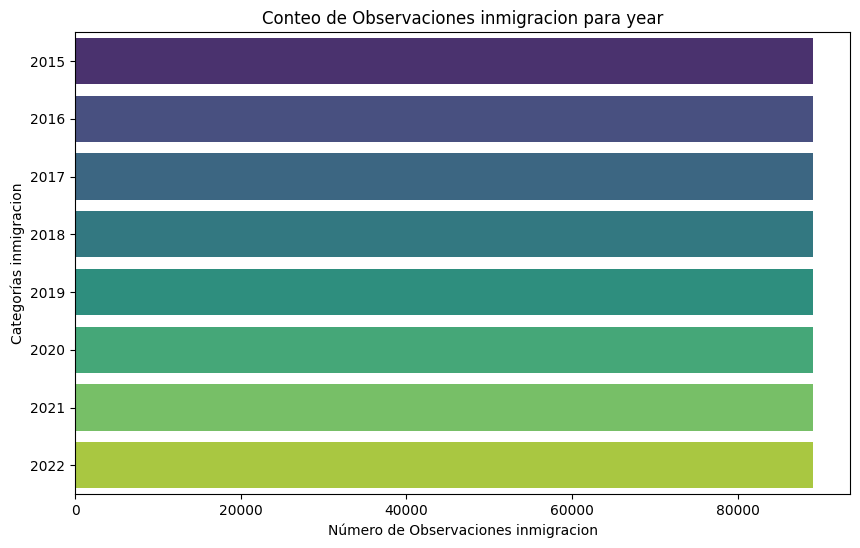

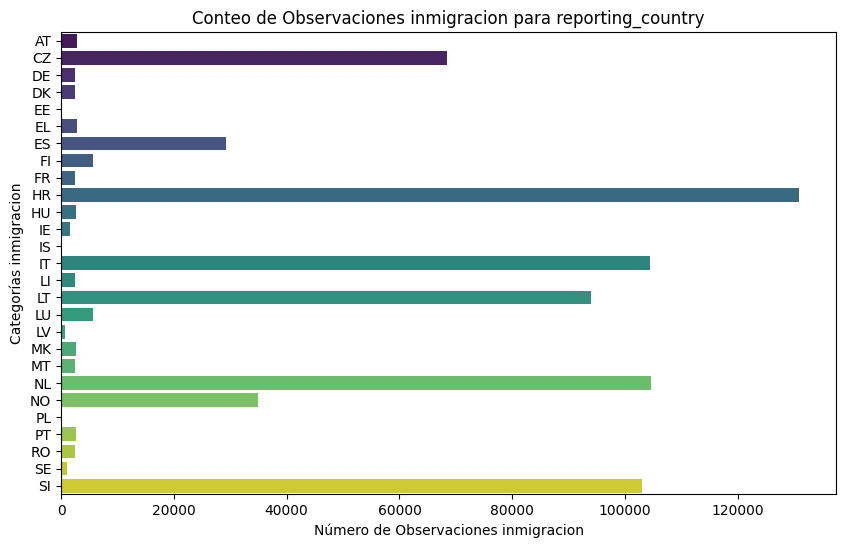

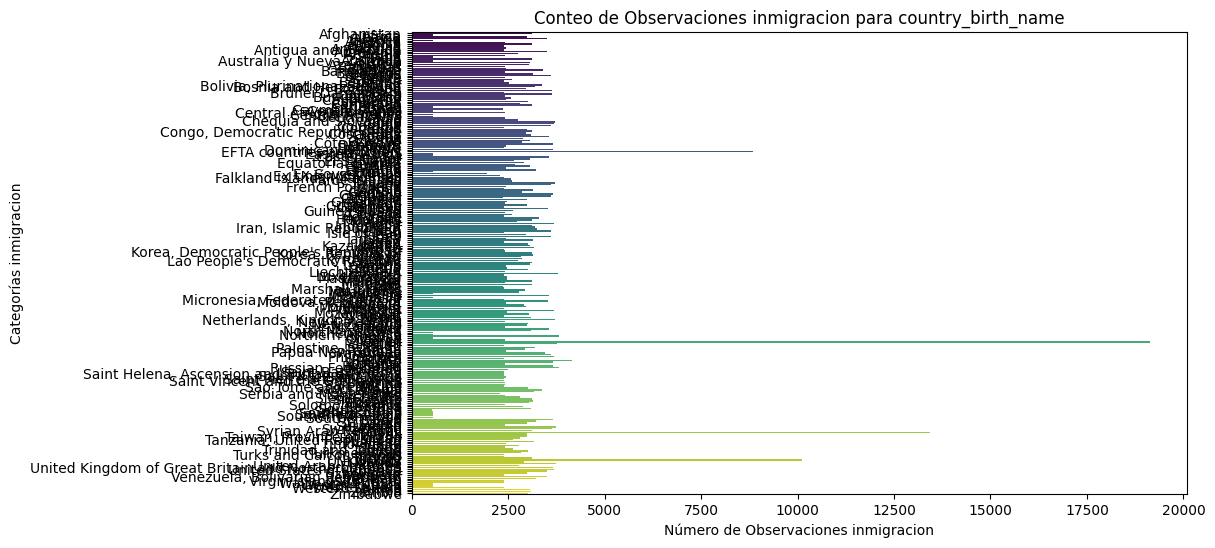

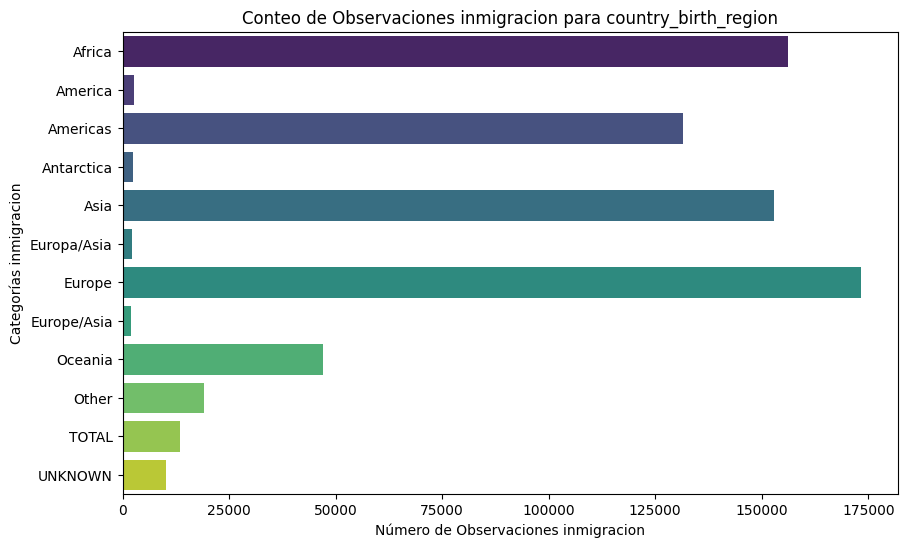

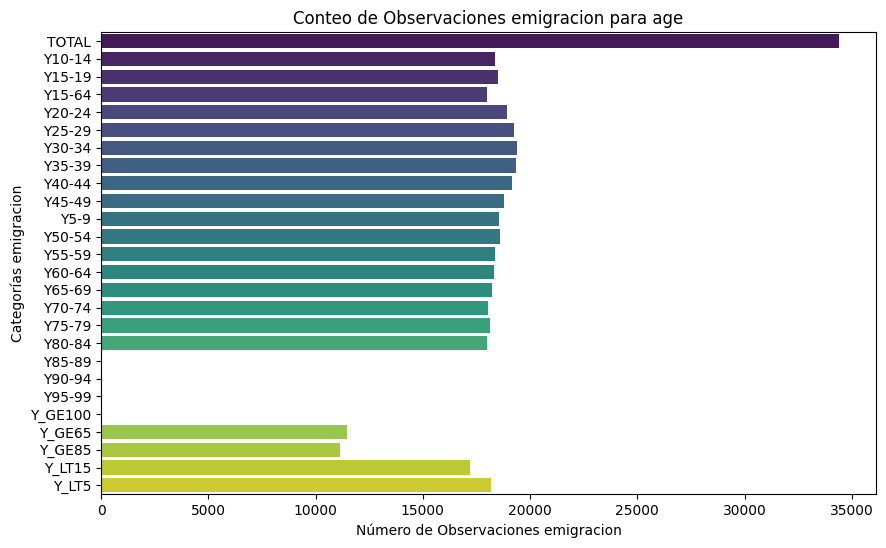

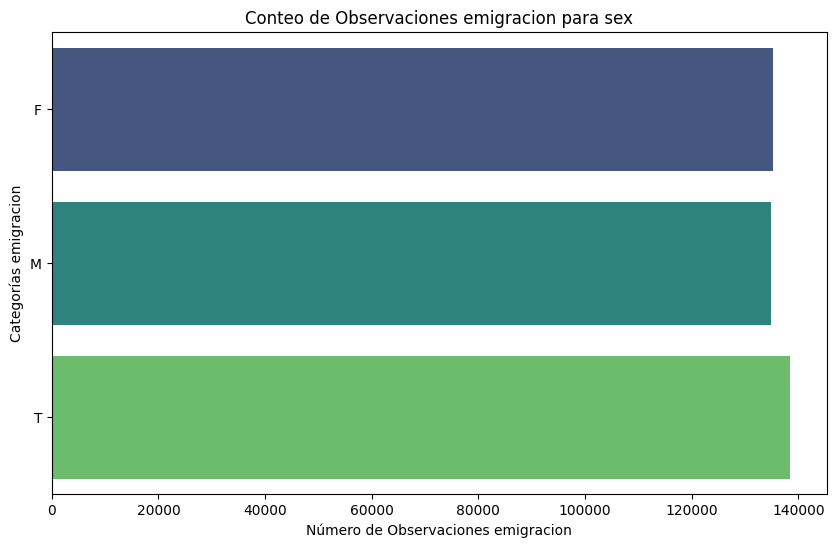

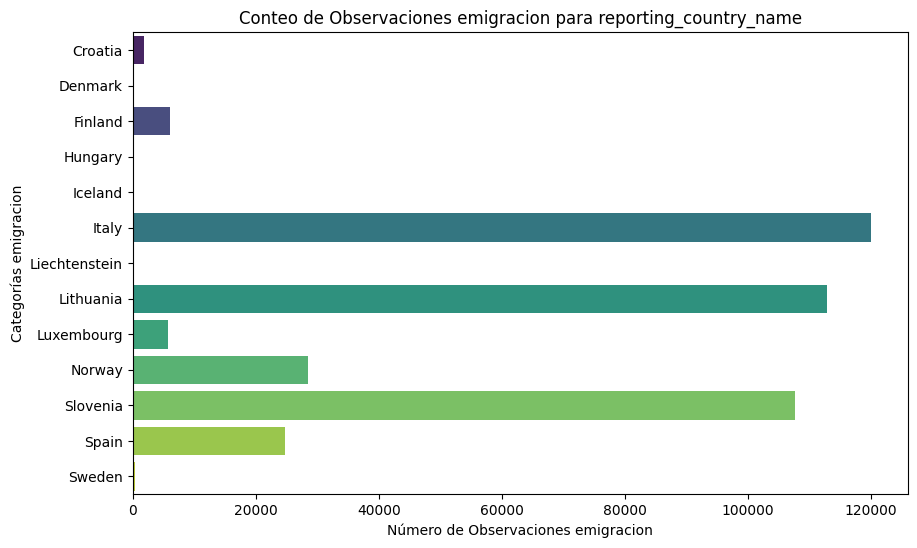

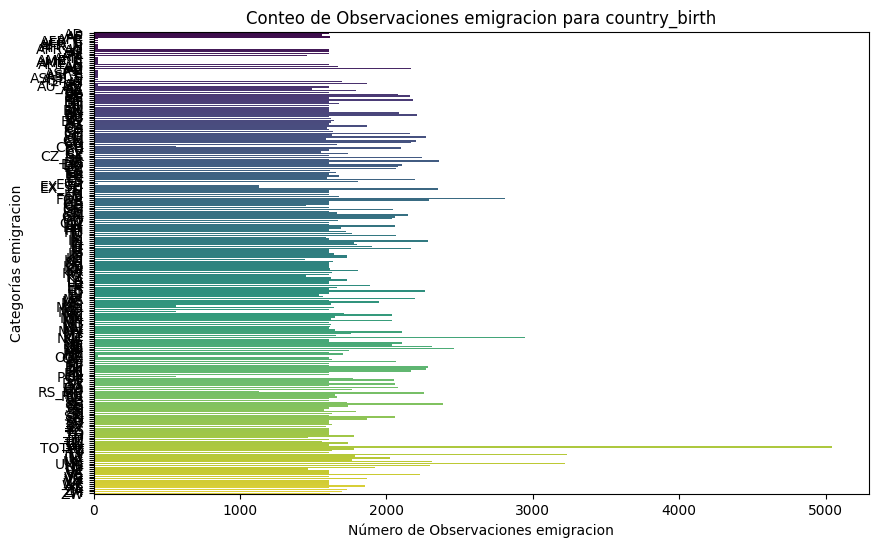

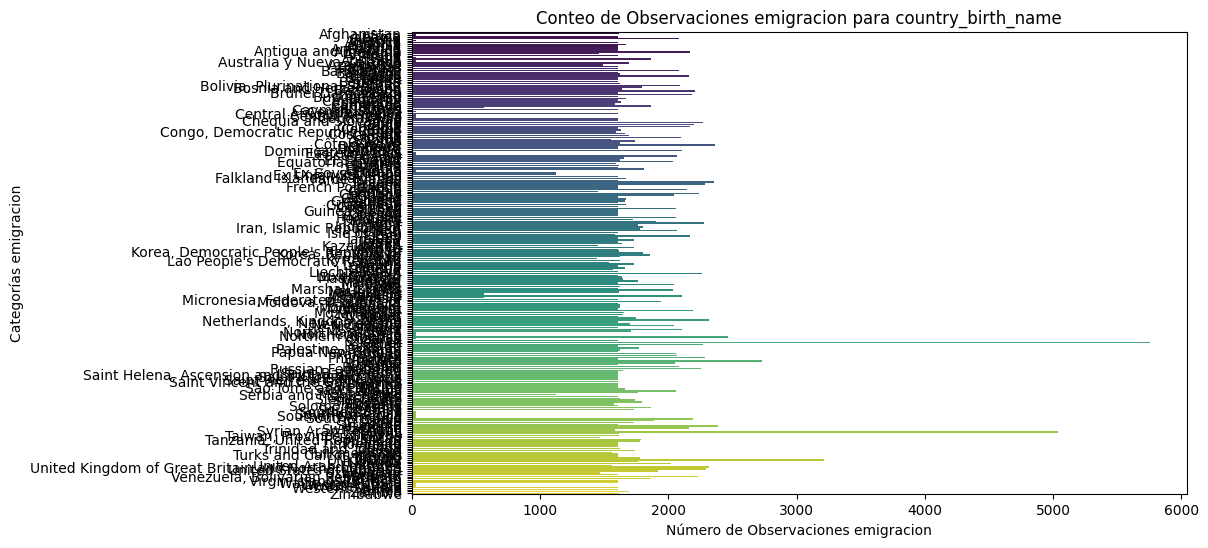

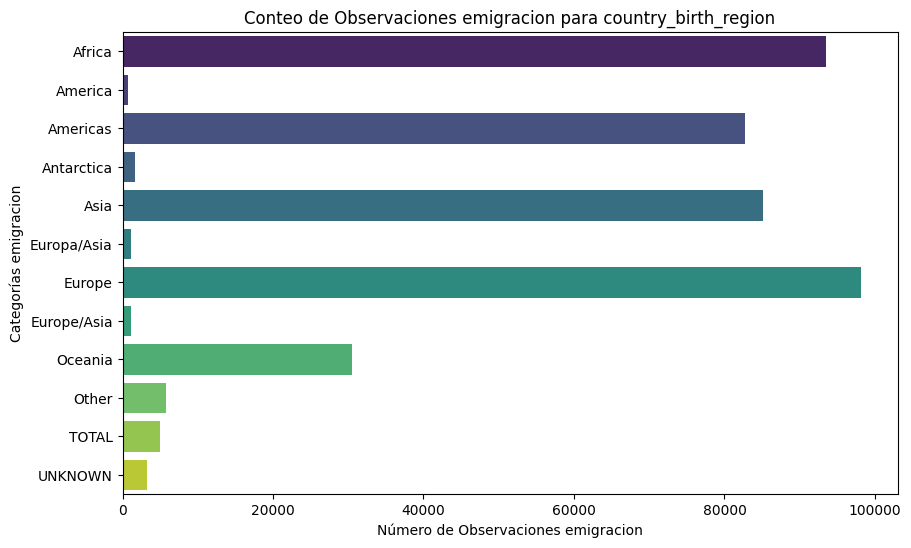

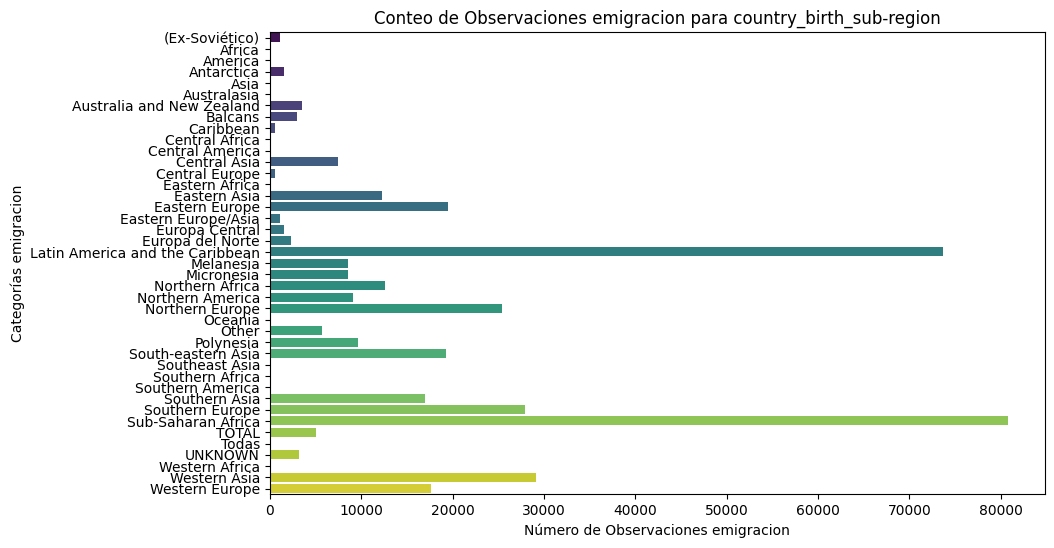

In [18]:
#para las variables categóricas contamos las observaciones de cada grupo
import matplotlib.pyplot as plt
import seaborn as sns

# Crear el gráfico
for variable in variables_categoricas_i:
    # Contar las observaciones de cada grupo (categoría)
    counts = merged_data_inmi[variable].value_counts()
    
    # Crear el gráfico de barras horizontal
    plt.figure(figsize=(10, 6))  # Tamaño del gráfico
    sns.barplot(x=counts.values, y=counts.index, orient='h', palette='viridis')  # gráfico horizontal
    plt.title(f'Conteo de Observaciones inmigracion para {variable}')
    plt.xlabel('Número de Observaciones inmigracion')
    plt.ylabel('Categorías inmigracion')
    plt.show()

# Crear el gráfico
for variable in variables_categoricas_e:
    # Contar las observaciones de cada grupo (categoría)
    counts = merged_data_emig[variable].value_counts()
    
    # Crear el gráfico de barras horizontal
    plt.figure(figsize=(10, 6))  # Tamaño del gráfico
    sns.barplot(x=counts.values, y=counts.index, orient='h', palette='viridis')  # gráfico horizontal
    plt.title(f'Conteo de Observaciones emigracion para {variable}')
    plt.xlabel('Número de Observaciones emigracion')
    plt.ylabel('Categorías emigracion')
    plt.show()

In [196]:
#creamos dos dataframes más uno sin totales del dataframe y otro solo con los totales
filtered_data_inmi_wo_total = merged_data_inmi[(merged_data_inmi['age'] != 'TOTAL') & 
                                               (merged_data_inmi['sex'] != 'T') & 
                                               (merged_data_inmi['country_birth'] != 'TOTAL')]


filtered_data_emig_wo_total = merged_data_emig[(merged_data_emig['age'] != 'TOTAL') & 
                                               (merged_data_emig['sex'] != 'T') & 
                                               (merged_data_emig['country_birth'] != 'TOTAL')]

filtered_data_inmi_only_total = merged_data_inmi[(merged_data_inmi['age'] == 'TOTAL') & 
                                               (merged_data_inmi['sex'] == 'T') & 
                                               (merged_data_inmi['country_birth'] == 'TOTAL')]


filtered_data_emig_only_total = merged_data_emig[(merged_data_emig['age'] != 'TOTAL') & 
                                               (merged_data_emig['sex'] != 'T') & 
                                               (merged_data_emig['country_birth'] == 'TOTAL')]

print(filtered_data_inmi_only_total)


        year    age sex reporting_country reporting_country_name  \
671     2015  TOTAL   T                HR                Croatia   
17027   2016  TOTAL   T                HR                Croatia   
33383   2017  TOTAL   T                HR                Croatia   
49739   2018  TOTAL   T                HR                Croatia   
66095   2019  TOTAL   T                HR                Croatia   
...      ...    ...  ..               ...                    ...   
648157  2018  TOTAL   T                IT                  Italy   
661214  2019  TOTAL   T                IT                  Italy   
674272  2020  TOTAL   T                IT                  Italy   
687335  2021  TOTAL   T                IT                  Italy   
700396  2022  TOTAL   T                IT                  Italy   

       reporting_country_region reporting_country_sub-region country_birth  \
671                      Europe              Southern Europe         TOTAL   
17027                    Eu

In [20]:
#Estadísticos de las variables numéricas
filtered_data_inmi_wo_total.describe().T



count          mean           std      min  \
inmigrations          430125.0  1.370312e+02  2.851662e+03      0.0   
avg_total_population  430125.0  1.702773e+07  2.101498e+07  37494.0   
death                 430125.0  1.834040e+05  2.293873e+05    249.0   
femenine_jan          430125.0  8.707329e+06  1.077584e+07  18813.0   
jan                   430125.0  1.702136e+07  2.101970e+07  37366.0   

                            25%        50%         75%         max  
inmigrations                0.0        0.0         4.0    647699.0  
avg_total_population  2842639.0  5236151.0  17441500.0  83797985.0  
death                   41106.0    57023.0    168678.0   1066341.0  
femenine_jan          1544399.0  2588874.0   8759554.0  42170339.0  
jan                   2859077.0  5213985.0  17407585.0  83237124.0

In [21]:
filtered_data_emig_wo_total.describe().T

count          mean           std        min  \
emigrations           245081.0  5.356004e+01  6.380524e+02        0.0   
avg_total_population  245081.0  2.308918e+07  2.668521e+07  2063531.0   
death                 245081.0  2.540206e+05  2.938021e+05    19689.0   
femenine_jan          245081.0  1.185734e+07  1.369369e+07  1039839.0   
jan                   245081.0  2.309679e+07  2.669990e+07  2062874.0   

                            25%        50%         75%         max  
emigrations                 0.0        0.0         1.0     38943.0  
avg_total_population  2112076.0  2877325.0  59133173.0  60229605.0  
death                   24016.0    41776.0    633133.0    740317.0  
femenine_jan          1049485.0  1563839.0  30369987.0  31067182.0  
jan                   2108977.0  2895573.0  59236213.0  60295497.0

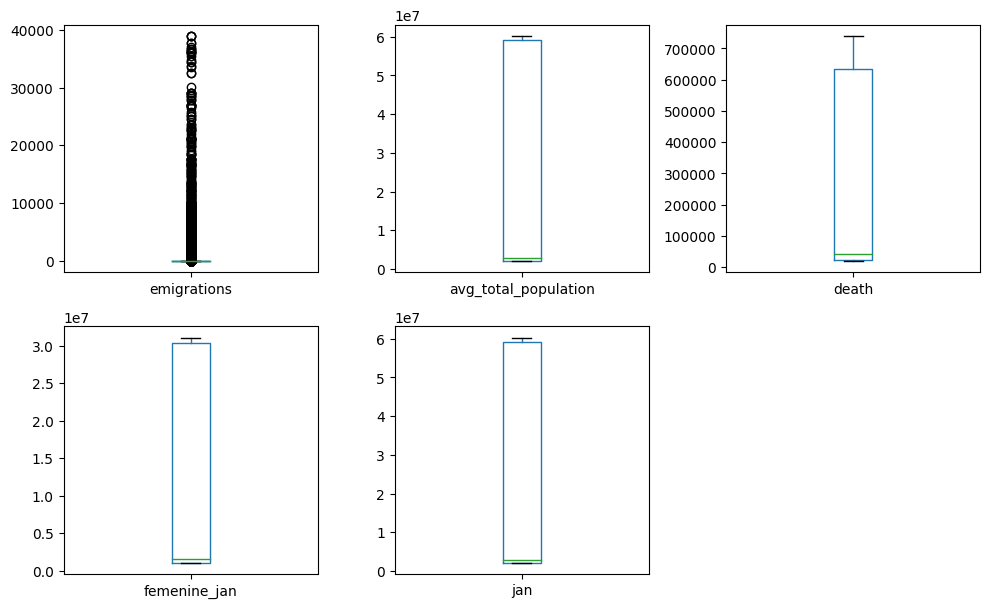

In [22]:
#bloxplot para visualizar los estadísticos
plt.figure(figsize=(10,15))

# Un boxplot para cada variable numérica
for i, col in enumerate(variables_numericas_e):
    plt.subplot(5,3,i+1)
    filtered_data_emig_wo_total.boxplot(col)
    plt.grid()
    plt.tight_layout()


In [23]:
#bloxplot para visualizar los estadísticos
plt.figure(figsize=(10,15))

# Un boxplot para cada variable numérica
for i, col in enumerate(variables_numericas_i):
    plt.subplot(5,3,i+1)
    filtered_data_inmi_wo_total.boxplot(col)
    plt.grid()
    plt.tight_layout()

In [66]:
#bloxplot para visualizar los estadísticos
plt.figure(figsize=(10,15))

# Un boxplot para cada variable numérica
for i, col in enumerate(variables_numericas_i):
    plt.subplot(5,3,i+1)
    filtered_data_inmi_only_total.boxplot(col)
    plt.grid()
    plt.tight_layout()

In [67]:
#bloxplot para visualizar los estadísticos
plt.figure(figsize=(10,15))

# Un boxplot para cada variable numérica
for i, col in enumerate(variables_numericas_e):
    plt.subplot(5,3,i+1)
    filtered_data_emig_only_total.boxplot(col)
    plt.grid()
    plt.tight_layout()

In [197]:
# Transformación logarítmica de la medida debido a lo dispersos que están los valores
filtered_data_inmi_wo_total['inmigrations_log'] = np.log1p(filtered_data_inmi_wo_total['inmigrations'])  # log(1 + x) para evitar log(0)
filtered_data_emig_wo_total['emigrations_log'] = np.log1p(filtered_data_emig_wo_total['emigrations'])
# Transformación logarítmica de la medida debido a lo dispersos que están los valores
filtered_data_inmi_only_total['inmigrations_log'] = np.log1p(filtered_data_inmi_wo_total['inmigrations'])  # log(1 + x) para evitar log(0)
filtered_data_emig_only_total['emigrations_log'] = np.log1p(filtered_data_emig_wo_total['emigrations'])

# Ver los primeros registros después de la transformación
print(filtered_data_inmi_wo_total[['inmigrations', 'inmigrations_log']].head())
print(filtered_data_emig_wo_total[['emigrations', 'emigrations_log']].head())

     inmigrations  inmigrations_log
747             0          0.000000
748             0          0.000000
750             0          0.000000
751             2          1.098612
753             0          0.000000
      emigrations  emigrations_log
6816            0         0.000000
6817            0         0.000000
6819            3         1.386294
6820            2         1.098612
6822            1         0.693147


C:\Users\34617\AppData\Local\Temp\ipykernel_36588\762605859.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\34617\AppData\Local\Temp\ipykernel_36588\762605859.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\34617\AppData\Local\Temp\ipykernel_36588\762605859.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograma con escala logarítmica
plt.figure(figsize=(10, 6))
sns.histplot(filtered_data_inmi_wo_total['inmigrations_log'], kde=True)
plt.yscale('log')  # Escala logarítmica para el eje y
plt.xlabel('Inmigraciones (log transformadas)')
plt.ylabel('Frecuencia')
plt.title('Distribución de Inmigraciones (Escala Logarítmica)')
plt.show()


Hemos tenido que hacer un histograma usando la funcion logarítmica pues como vemos en los boxplots la distribución no es en absoluto normal y existen muchos outliers que dificulta la visualización del histograma.
Vemos que hay una asimetría a la izquierda y que más del 75% de las observaciones tiene valores de inmigración inferiores a 10.

In [30]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=filtered_data_inmi_wo_total['inmigrations_log'])
plt.title('Boxplot de Inmigraciones (Transformación Logarítmica)')
plt.xlabel('Inmigraciones')
plt.show()

Vemos más claramente ahora un boxplot con el valor escalado de inmigraciones que hay muchos outliers.  Realmente esto es interesante en esta visualización.  Detectar estas anomalías o cuales son los factores geográficos o de edad que hacen que en algunos casos hay muchas más inmigraciones.  Veamos cual sería la distribución eliminando del dataset los valores por debajo o igual a 10 en inmigraciones.

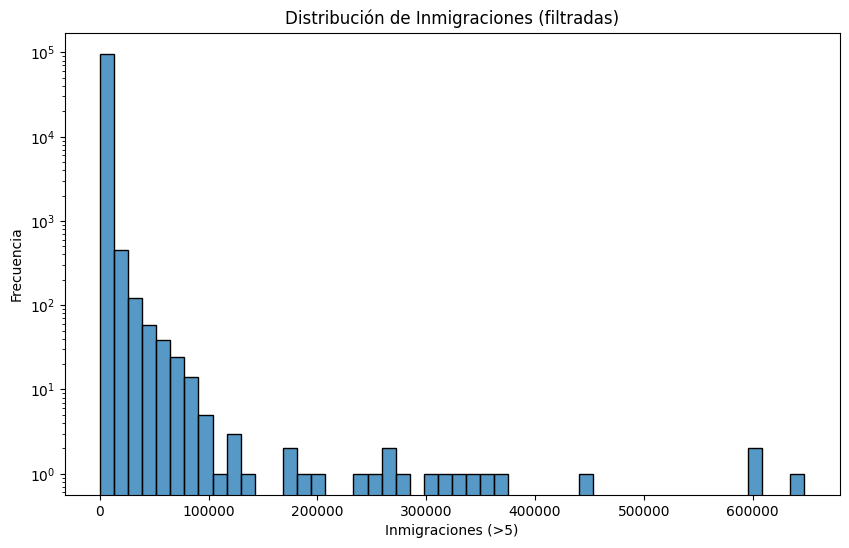

In [31]:
#filtramos por encima del cuartile 75% que nos daba 9 como valor en inmigraciones y 4 en emigraciones

filtered_data_inmi = filtered_data_inmi_wo_total[filtered_data_inmi_wo_total['inmigrations'] > 5]
filtered_data_emig = filtered_data_emig_wo_total[filtered_data_emig_wo_total['emigrations'] > 2]

plt.figure(figsize=(10, 6))
sns.histplot(filtered_data_inmi['inmigrations'], kde=False, bins=50)
plt.yscale('log')
plt.xlabel('Inmigraciones (>5)')
plt.ylabel('Frecuencia')
plt.title('Distribución de Inmigraciones (filtradas)')
plt.show()


In [43]:
import plotly.graph_objects as go

# mismo histograma el plotly
fig = go.Figure()

fig.add_trace(go.Histogram(
    x=filtered_data_inmi['inmigrations'],  # Datos de inmigraciones
    nbinsx=50,  # Número de bins
))

# escalamos en la escala logarítmica en el eje Y
fig.update_layout(
    yaxis_type="log",  # Escala logarítmica
    xaxis_title="Inmigraciones (>5)",  # Título del eje X
    yaxis_title="Frecuencia",  # Título del eje Y
    title="Distribución de Inmigraciones (filtradas)",  # Título de la gráfica
    template="plotly_white",  # Estilo de la gráfica
    plot_bgcolor='rgba(0,0,0,0)',  # Fondo del gráfico transparente
    paper_bgcolor='rgba(0,0,0,0)',  # Fondo fuera del gráfico transparente
    title_font=dict(color='#FFC107', size=20),  # Título en color amarillo oscuro
    xaxis_title_font=dict(color='#FFC107', size=15),  # Título del eje X en color amarillo oscuro
    yaxis_title_font=dict(color='#FFC107', size=15),  # Título del eje Y en color amarillo oscuro
    font=dict(color='#FFC107'),  # Color de las etiquetas en todo el gráfico
)

# muestramelo
fig.show()



<AxesSubplot: xlabel='inmigrations', ylabel='Density'>

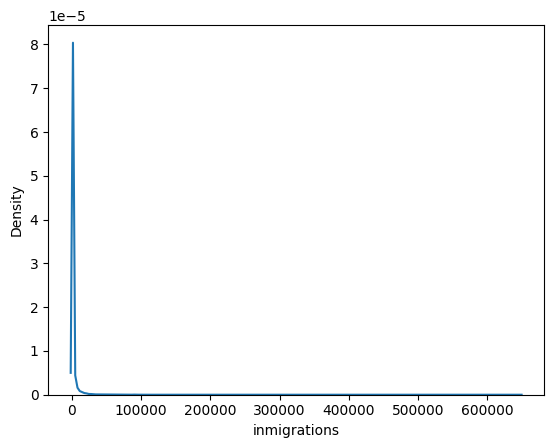

In [34]:
import seaborn as sns

# Density plot 
sns.kdeplot(filtered_data_inmi['inmigrations'])

Podemos decir que un porcentaje alto de los países de europa reportan inmigraciones entre 0 y 19.99k.

El histograma filtrado ahora puede visualizarse correctamente y nos muestra aún asimetría a la izquierda es decir gran concentración de observaciones con pocas inmigraciones y además es un histograma con ciertos intervalos vacíos o histograma discontinuo.

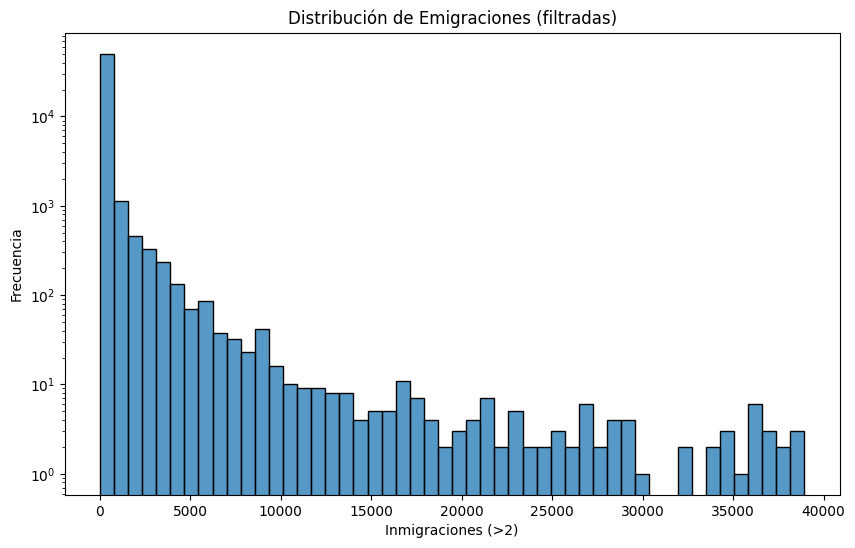

In [36]:
plt.figure(figsize=(10, 6))
sns.histplot(filtered_data_emig['emigrations'], kde=False, bins=50)
plt.yscale('log')
plt.xlabel('Inmigraciones (>2)')
plt.ylabel('Frecuencia')
plt.title('Distribución de Emigraciones (filtradas)')
plt.show()

<AxesSubplot: xlabel='emigrations', ylabel='Density'>

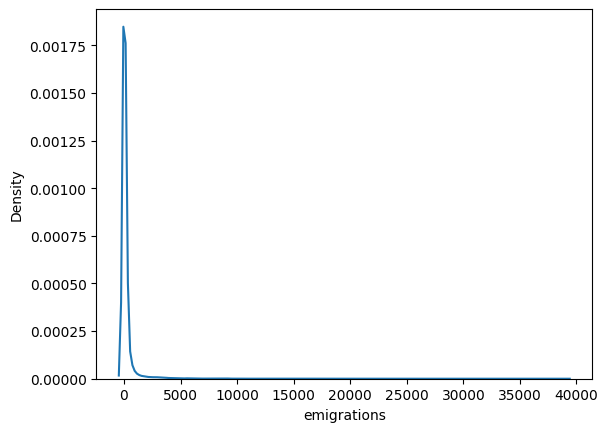

In [37]:
sns.kdeplot(filtered_data_emig['emigrations'])

In [42]:
import plotly.graph_objects as go

# mismo histograma el plotly
fig = go.Figure()

fig.add_trace(go.Histogram(
    x=filtered_data_emig['emigrations'],  # Datos de inmigraciones
    nbinsx=50,  # Número de bins
))

# escalamos en la escala logarítmica en el eje Y
fig.update_layout(
    yaxis_type="log",  # Escala logarítmica
    xaxis_title="Emigraciones (>2)",  # Título del eje X
    yaxis_title="Frecuencia",  # Título del eje Y
    title="Distribución de Emigraciones (filtradas)",  # Título de la gráfica
    template="plotly_white",  # Estilo de la gráfica
    plot_bgcolor='rgba(0,0,0,0)',  # Fondo del gráfico transparente
    paper_bgcolor='rgba(0,0,0,0)',  # Fondo fuera del gráfico transparente
    title_font=dict(color='#FFC107', size=20),  # Título en color amarillo oscuro
    xaxis_title_font=dict(color='#FFC107', size=15),  # Título del eje X en color amarillo oscuro
    yaxis_title_font=dict(color='#FFC107', size=15),  # Título del eje Y en color amarillo oscuro
    font=dict(color='#FFC107'),  # Color de las etiquetas en todo el gráfico
)

# muestramelo
fig.show()


Muchos de los países reportan entre 0 y 999 emigraciones. El histograma filtrado de emigraciones igual que el de inmigraciones nos muestra aún asimetría a la izquierda es decir gran concentración de observaciones con pocas emigraciones y además es un histograma con ciertos intervalos vacíos o histograma discontinuo

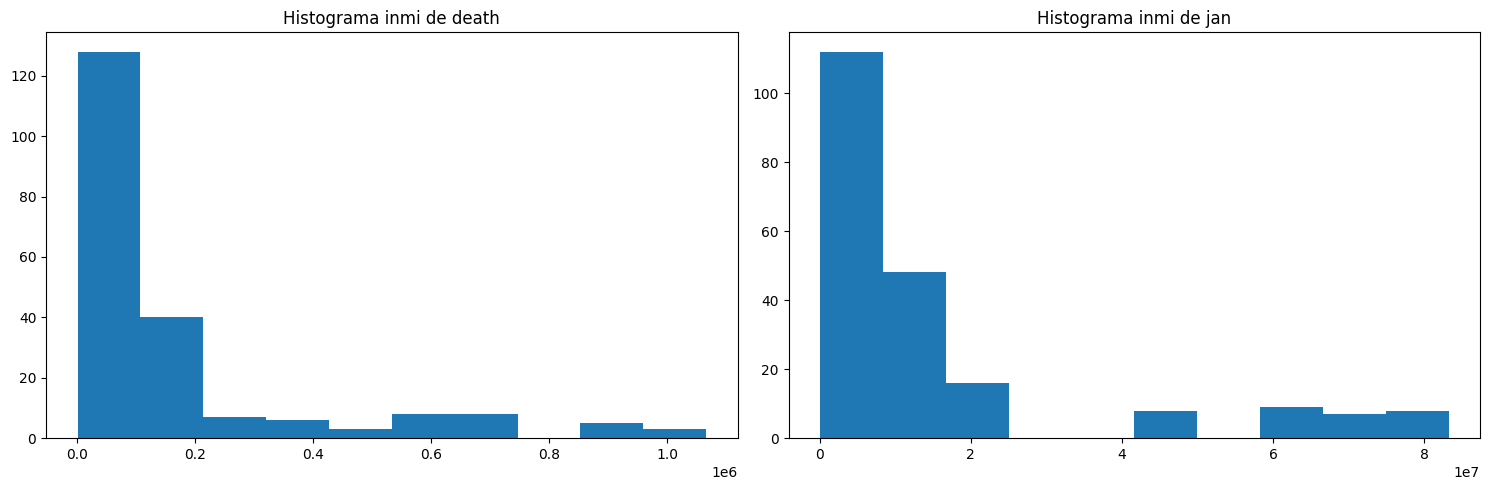

In [69]:
# visualicemos la poblacin y muertes
# elimino duplicados basados en las columnas 'year', 'reporting_country'/'country_birth' 'deaths', y 'jan' pues la granularidad es diferente

#merged_data_unique_i = merged_data_inmi.drop_duplicates(subset=['year', 'reporting_country', 'country_birth','death', 'jan'])
#merged_data_unique_e = merged_data_emig.drop_duplicates(subset=['year', 'reporting_country', 'country_birth','death', 'jan'])

# ya no hay que hacer lo de arriba pues teongo filtered_data_inmi_only_total
# ya no hay que hacer lo de arriba pues teongo filtered_data_emig_only_total

#print(merged_data_unique_i.head())
#print(merged_data_unique_e.head())

histogramas = ['death', 'jan']

fig, axs = plt.subplots(1, len(histogramas), figsize=(15, 5))

# Histograma para cada valor en la variable histogramas
for i, col in enumerate(histogramas):
    axs[i].hist(filtered_data_inmi_only_total[col])
    axs[i].set_title(f'Histograma inmi de {col}')

# Superponemos
plt.tight_layout()

# Y pintamos
plt.show()



In [70]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Lista de columnas a graficar
histogramas = ['death', 'jan']

# Crear la figura con subgráficos
fig = make_subplots(rows=1, cols=len(histogramas), 
                    subplot_titles=[f'' for col in histogramas])

# Añadir un histograma para cada columna
for i, col in enumerate(histogramas):
    fig.add_trace(go.Histogram(
        x=filtered_data_inmi_only_total[col],
        name=f'Histograma inmi de {col}'
    ), row=1, col=i+1)

# Actualizar el diseño del gráfico
fig.update_layout(
    title="Histogramas poblacion y muertes de paises que reportan inmigraciones",
    showlegend=False,
    height=500,  # Ajuste la altura del gráfico
    width=1000,  # Ajuste el ancho del gráfico
    template="plotly_white",  # Estilo de la gráfica
    plot_bgcolor='rgba(0,0,0,0)',  # Fondo del gráfico transparente
    paper_bgcolor='rgba(0,0,0,0)',  # Fondo fuera del gráfico transparente
    title_font=dict(color='#FFC107', size=20),  # Título en color amarillo oscuro
    xaxis_title_font=dict(color='#FFC107', size=15),  # Título del eje X en color amarillo oscuro
    yaxis_title_font=dict(color='#FFC107', size=15),  # Título del eje Y en color amarillo oscuro
    font=dict(color='#FFC107'),  # Color de las etiquetas en todo el gráfico
)

# Actualizar títulos de los ejes específicos para cada subgráfico
fig.update_xaxes(title_text="Mortalidad", row=1, col=1)  # Primer subgráfico
fig.update_xaxes(title_text="Población", row=1, col=2)  # Segundo subgráfico

# Mostrar la figura
fig.show()


In [45]:
# Histograma para cada valor en la variable histogramas
fig, axs = plt.subplots(1, len(histogramas), figsize=(15, 5))

for i, col in enumerate(histogramas):
    axs[i].hist(filtered_data_emig_only_total[col])
    axs[i].set_title(f'Histograma emig de {col}')

# Superponemos
plt.tight_layout()

# Y pintamos
plt.show()

In [71]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Lista de columnas a graficar
histogramas = ['death', 'jan']

# Crear la figura con subgráficos
fig = make_subplots(rows=1, cols=len(histogramas), 
                    subplot_titles=[f'' for col in histogramas])

# Añadir un histograma para cada columna
for i, col in enumerate(histogramas):
    fig.add_trace(go.Histogram(
        x=filtered_data_emig_only_total[col],
        name=f'Histograma emig de {col}'
    ), row=1, col=i+1)

# Actualizar el diseño del gráfico
fig.update_layout(
    title="Histogramas poblacion y muertes de paises que reportan emigraciones",
    showlegend=False,
    height=500,  # Ajuste la altura del gráfico
    width=1000,  # Ajuste el ancho del gráfico
    template="plotly_white",  # Estilo de la gráfica
    plot_bgcolor='rgba(0,0,0,0)',  # Fondo del gráfico transparente
    paper_bgcolor='rgba(0,0,0,0)',  # Fondo fuera del gráfico transparente
    title_font=dict(color='#FFC107', size=20),  # Título en color amarillo oscuro
    xaxis_title_font=dict(color='#FFC107', size=15),  # Título del eje X en color amarillo oscuro
    yaxis_title_font=dict(color='#FFC107', size=15),  # Título del eje Y en color amarillo oscuro
    font=dict(color='#FFC107'),  # Color de las etiquetas en todo el gráfico
)

# Actualizar títulos de los ejes específicos para cada subgráfico
fig.update_xaxes(title_text="Mortalidad", row=1, col=1)  # Primer subgráfico
fig.update_xaxes(title_text="Población", row=1, col=2)  # Segundo subgráfico


# Mostrar la figura
fig.show()

La distribución de la población (jan) y muertes (death) también es asimétrica a la izquierda y son coherentes los números entre ambas.  También los rangos son discontinuas presentando huecos en el histograma. 

## 2.2 Análisis exploratorio de los datos

Exploramos la relación de algunos de los atributos numéricos con las variables categóricas.

In [85]:
import pandas as pd
import plotly.express as px

# Filtrar los datos para seleccionar solo el año 2022
data_2022 = filtered_data_inmi_only_total[filtered_data_inmi_only_total['year'] == 2022]

# Ordenar el dataframe por población ('jan') de mayor a menor
sorted_data_2022 = data_2022.sort_values('jan', ascending=True)

#print(sorted_data_2022)

# Crear gráfico de barras horizontales
fig = px.bar(
    sorted_data_2022,            # Usar el dataframe filtrado y ordenado
    x='jan',                     # Eje X: número de registros
    y='reporting_country_name',       # Eje Y: países
    orientation='h',             # Orientación horizontal
    title="Ranking de población por país que reporta (2022)",
    labels={'jan': 'Población', 'reporting_country_name': 'País'},  # Etiquetas
    template="plotly_white"
)

# Ajustar el eje Y para que se muestren todas las etiquetas
fig.update_layout(
    yaxis=dict(
        tickmode='array',                     # Asegura que todas las categorías se muestren
        tickvals=sorted_data_2022['reporting_country_name'].tolist(),  # Usa todas las categorías
        ticktext=sorted_data_2022['reporting_country_name'].tolist(), # Muestra las etiquetas completas
        tickangle=0,                          # Para evitar que las etiquetas se corten
    ),
    height=600,  # Ajusta el tamaño del gráfico si es necesario
    width=1000   # Ajusta el ancho si es necesario
)

fig.update_layout(
    yaxis=dict(
        categoryorder='total ascending'  # Ordenar según el valor de 'jan'
    ),
    height=600,        # Altura del gráfico
    width=1000,        # Ancho del gráfico
    plot_bgcolor='rgba(0,0,0,0)',  # Fondo transparente
    paper_bgcolor='rgba(0,0,0,0)',  # Fondo del lienzo transparente
    title_font=dict(color='#FFC107', size=20),  # Título en color amarillo oscuro
    xaxis_title_font=dict(color='#FFC107', size=15),  # Título del eje X en color amarillo oscuro
    yaxis_title_font=dict(color='#FFC107', size=15),  # Título del eje Y en color amarillo oscuro
    font=dict(color='#FFC107')  # Color de las etiquetas en todo el gráfico
)

# Mostrar el gráfico
fig.show()

In [83]:
import pandas as pd
import plotly.express as px

# Filtrar los datos para seleccionar solo el año 2022
data_2022 = filtered_data_inmi_only_total[filtered_data_inmi_only_total['year'] == 2022]

# Ordenar el dataframe por población ('jan') de mayor a menor
sorted_data_2022 = data_2022.sort_values('death', ascending=True)

#print(sorted_data_2022)

# Crear gráfico de barras horizontales
fig = px.bar(
    sorted_data_2022,            # Usar el dataframe filtrado y ordenado
    x='death',                     # Eje X: número de registros
    y='reporting_country',       # Eje Y: países
    orientation='h',             # Orientación horizontal
    title="Ranking de muertes por país que reporta (2022)",
    labels={'death': 'Muertes', 'reporting_country': 'País'},  # Etiquetas
    template="plotly_white",     # Estilo del gráfico
)

# Ajustar el eje Y para que se muestren todas las etiquetas
fig.update_layout(
    yaxis=dict(
        tickmode='array',                     # Asegura que todas las categorías se muestren
        tickvals=sorted_data_2022['reporting_country'].tolist(),  # Usa todas las categorías
        ticktext=sorted_data_2022['reporting_country'].tolist(), # Muestra las etiquetas completas
        tickangle=0,                          # Para evitar que las etiquetas se corten
    ),
    height=600,  # Ajusta el tamaño del gráfico si es necesario
    width=1000   # Ajusta el ancho si es necesario
)

fig.update_layout(
    yaxis=dict(
        categoryorder='total ascending'  # Ordenar según el valor de 'jan'
    ),
    height=600,        # Altura del gráfico
    width=1000,        # Ancho del gráfico
    plot_bgcolor='rgba(0,0,0,0)',  # Fondo transparente
    paper_bgcolor='rgba(0,0,0,0)',  # Fondo del lienzo transparente
    title_font=dict(color='#FFC107', size=20),  # Título en color amarillo oscuro
    xaxis_title_font=dict(color='#FFC107', size=15),  # Título del eje X en color amarillo oscuro
    yaxis_title_font=dict(color='#FFC107', size=15),  # Título del eje Y en color amarillo oscuro
    font=dict(color='#FFC107')  # Color de las etiquetas en todo el gráfico
)

# Mostrar el gráfico
fig.show()

In [84]:
# Calcular la tasa de muertes por población (por cada 100,000 habitantes)
sorted_data_2022['death_rate_per_100k'] = (sorted_data_2022['death'] / sorted_data_2022['jan']) * 100000

# Agrupar por 'reporting_country' y calcular el promedio de la tasa de muertes por población
data_aggregated = sorted_data_2022.groupby('reporting_country_name')['death_rate_per_100k'].mean().reset_index()

# Ordenar los datos de mayor a menor
data_aggregated = data_aggregated.sort_values(by='death_rate_per_100k', ascending=False)

# Crear gráfico de barras horizontales
fig = px.bar(
    data_aggregated,
    x='death_rate_per_100k',         # Eje X: tasa de muertes por población
    y='reporting_country_name',           # Eje Y: países
    orientation='h',                 # Orientación horizontal
    title="Tasa de muertes por país que reporta (2022)",
    labels={'death_rate_per_100k': 'Tasa de muertes por cada 100,000 habitantes', 'reporting_country_name': 'País'},  # Etiquetas
    template="plotly_white",         # Estilo del gráfico
    category_orders={'reporting_country_name': data_aggregated.sort_values('death_rate_per_100k', ascending=False)['reporting_country_name'].tolist()}
)

# Ajustar el eje Y para que se muestren todas las etiquetas
fig.update_layout(
    yaxis=dict(
        tickmode='array',                     # Asegura que todas las categorías se muestren
        tickvals=data_aggregated['reporting_country_name'].tolist(),  # Usa todas las categorías
        ticktext=data_aggregated['reporting_country_name'].tolist(), # Muestra las etiquetas completas
        tickangle=0,                          # Para evitar que las etiquetas se corten
    ),
    height=600,  # Ajusta el tamaño del gráfico si es necesario
    width=1000   # Ajusta el ancho si es necesario
)

fig.update_layout(
    yaxis=dict(
        categoryorder='total ascending'  # Ordenar según el valor de 'jan'
    ),
    height=600,        # Altura del gráfico
    width=1000,        # Ancho del gráfico
    plot_bgcolor='rgba(0,0,0,0)',  # Fondo transparente
    paper_bgcolor='rgba(0,0,0,0)',  # Fondo del lienzo transparente
    title_font=dict(color='#FFC107', size=20),  # Título en color amarillo oscuro
    xaxis_title_font=dict(color='#FFC107', size=15),  # Título del eje X en color amarillo oscuro
    yaxis_title_font=dict(color='#FFC107', size=15),  # Título del eje Y en color amarillo oscuro
    font=dict(color='#FFC107')  # Color de las etiquetas en todo el gráfico
)

# Mostrar el gráfico
fig.show()

In [106]:
import pandas as pd
import plotly.express as px

# Calcular la tasa de muertes por cada 100,000 habitantes
sorted_data_2022['death_rate_per_100k'] = (sorted_data_2022['death'] / sorted_data_2022['jan']) * 100000

# Agrupar por 'reporting_country_name' y calcular el promedio de la tasa de muertes
data_aggregated = sorted_data_2022.groupby('reporting_country_name')['death_rate_per_100k'].mean().reset_index()

# Agregar el ranking de inmigración al dataframe agrupado
data_aggregated['inmigration_rank'] = sorted_data_2022.groupby('reporting_country_name')['inmigrations'].sum().rank(ascending=False).values

# Crear el gráfico de coordenadas paralelas
fig = px.parallel_coordinates(
    data_aggregated,
    dimensions=['inmigration_rank', 'death_rate_per_100k'],  # Columnas para el gráfico
    labels={
        'inmigration_rank': 'Ranking de Inmigración',
        'death_rate_per_100k': 'Tasa de Mortalidad (por 100k)'
    },
    color='death_rate_per_100k',  # Colorear las líneas según la tasa de mortalidad
    color_continuous_scale=px.colors.sequential.Viridis  # Paleta de colores
)

# Configurar el diseño del gráfico
fig.update_layout(
    title="Relación entre Ranking de Inmigración y Tasa de Mortalidad por País",
      height=700,        # Altura del gráfico
    width=1000,        # Ancho del gráfico
    margin={"t": 100},  # Aumentar el margen superior (t: top) para dejar más espacio
    plot_bgcolor='rgba(0,0,0,0)',  # Fondo transparente
    paper_bgcolor='rgba(0,0,0,0)',  # Fondo del lienzo transparente
    title_font=dict(color='#FFC107', size=20),  # Título en color amarillo oscuro
    xaxis_title_font=dict(color='#FFC107', size=15),  # Título del eje X en color amarillo oscuro
    yaxis_title_font=dict(color='#FFC107', size=15),  # Título del eje Y en color amarillo oscuro
    font=dict(color='#FFC107')  # Color de las etiquetas en todo el gráfico
)

# Mostrar el gráfico
fig.show()


In [128]:
import plotly.graph_objects as go
import numpy as np
import pandas as pd
from scipy.stats import gaussian_kde

# Configuración inicial
countries = filtered_data_inmi['country_birth_sub-region'].unique()  # Usamos filtered_data_inmi para las subregiones

# Filtramos los datos para las subregiones y eliminamos valores nulos o extremos
filtered_data_inmi_bycb = filtered_data_inmi[filtered_data_inmi['country_birth_sub-region'].isin(countries)]

# Aseguramos que no tengamos valores cero antes de aplicar el logaritmo
filtered_data_inmi_bycb = filtered_data_inmi_bycb[filtered_data_inmi_bycb['inmigrations'] > 0]  

# Creamos una nueva columna con el logaritmo de las inmigraciones
filtered_data_inmi_bycb['inmigrations_log'] = np.log(filtered_data_inmi_bycb['inmigrations'])

# Diccionario para almacenar los datos de inmigración logarítmica
array_dict = {}

for country in countries:
    # Extraemos los datos correspondientes para cada subregión
    subset = filtered_data_inmi_bycb[filtered_data_inmi_bycb['country_birth_sub-region'] == country]
    
    # Realizamos una estimación de densidad con KDE para suavizar las distribuciones
    kde = gaussian_kde(subset['inmigrations_log'], bw_method=0.2)  # Ajustamos el parámetro de ancho de banda si es necesario
    x_vals = np.linspace(subset['inmigrations_log'].min(), subset['inmigrations_log'].max(), 500)  # Rango de valores logarítmicos
    y_vals = kde(x_vals)  # Evaluamos la densidad
    
    # Normalizamos los valores para que las curvas no se solapen
    y_vals_normalized = (y_vals - y_vals.min()) / (y_vals.max() - y_vals.min())  # Normalización

    # Guardamos los valores de x e y para cada país
    array_dict[f'x_{country}'] = x_vals
    array_dict[f'y_{country}'] = y_vals_normalized + (len(countries)-np.where(countries == country)[0][0])  # Desplazamos las curvas

# Creamos la figura de Plotly
fig = go.Figure()

# Añadimos las curvas de cada país
for index, country in enumerate(countries):
    # Añadimos una línea base blanca para separar las curvas
    fig.add_trace(go.Scatter(
                            x=[-20, 40], y=np.full(2, len(countries)-index),
                            mode='lines',
                            line_color='white'))
    
    # Añadimos la curva de inmigración logarítmica con su correspondiente relleno
    fig.add_trace(go.Scatter(
                            x=array_dict[f'x_{country}'],
                            y=array_dict[f'y_{country}'],
                            fill='tonexty',
                            name=f'{country}'))
    
   # Añadimos el nombre del país como anotación (fuera del gráfico para evitar solapamiento)
    fig.add_annotation(
                        x=array_dict[f'x_{country}'][0],  # Primer valor de 'x' de la curva
                        y=len(valid_countries)-index + 0.10,  # Ajustamos la posición para que no se solape
                        text=f'{country}',
                        showarrow=False,
                        font=dict(size=12, color="darkred"),  # Cambiar el color a rojo oscuro
                        )  # Ajustamos el espacio para que se vea claramente con yshift=15

# Personalización del gráfico
fig.update_layout(
                title='Distribución por país de nacimiento de inmigraciones (escala logarítmica)',
                showlegend=False,
                xaxis=dict(title='Inmigraciones (log)', tickformat='.0f'),
                yaxis=dict(showticklabels=False),  # Ocultamos las etiquetas del eje Y
                template="plotly_white",  # Estilo blanco para el gráfico
                height=800,
                width=1000,
                plot_bgcolor='rgba(0,0,0,0)',  # Fondo transparente
                paper_bgcolor='rgba(0,0,0,0)',  # Fondo del lienzo transparente
                title_font=dict(color='#FFC107', size=20),  # Título en color amarillo oscuro
                xaxis_title_font=dict(color='#FFC107', size=15),  # Título del eje X en color amarillo oscuro
                yaxis_title_font=dict(color='#FFC107', size=15),  # Título del eje Y en color amarillo oscuro
                font=dict(color='#FFC107')  # Color de las etiquetas en todo el gráfico
)

fig.show()





In [134]:
import plotly.graph_objects as go
import numpy as np
import pandas as pd
from scipy.stats import gaussian_kde

# Configuración inicial
countries = filtered_data_inmi_wo_total['country_birth_sub-region'].unique()  # Usamos filtered_data_inmi para las subregiones

# Filtramos los datos para las subregiones y eliminamos valores nulos o extremos
filtered_data_inmi_bycb = filtered_data_inmi_wo_total[filtered_data_inmi_wo_total['country_birth_sub-region'].isin(countries)]

# Aseguramos que no tengamos valores cero o negativos antes de aplicar el logaritmo
filtered_data_inmi_bycb = filtered_data_inmi_bycb[filtered_data_inmi_bycb['inmigrations'] > 0]

# Creamos una nueva columna con el logaritmo de las inmigraciones
filtered_data_inmi_bycb['inmigrations_log'] = np.log(filtered_data_inmi_bycb['inmigrations'])

# Filtrar países con suficientes datos (al menos 3 puntos de datos para aplicar KDE)
valid_countries = []
for country in countries:
    subset = filtered_data_inmi_bycb[filtered_data_inmi_bycb['country_birth_sub-region'] == country]
    
    if len(subset) >= 3 and subset['inmigrations_log'].nunique() > 1:  # Al menos 3 datos distintos
        valid_countries.append(country)

# Redefinimos el conjunto de datos con solo países válidos
filtered_data_inmi_bycb_valid = filtered_data_inmi_bycb[filtered_data_inmi_bycb['country_birth_sub-region'].isin(valid_countries)]

# Diccionario para almacenar los datos de inmigración logarítmica
array_dict = {}

# Desplazamiento entre las curvas (ajustado para mejorar la legibilidad)
space_between_curves = 1.5

for idx, country in enumerate(valid_countries):  # Usamos enumerate para obtener el índice y el país
    # Extraemos los datos correspondientes para cada subregión
    subset = filtered_data_inmi_bycb_valid[filtered_data_inmi_bycb_valid['country_birth_sub-region'] == country]
    
    # Realizamos una estimación de densidad con KDE para suavizar las distribuciones
    kde = gaussian_kde(subset['inmigrations_log'], bw_method=0.5)  # Ajustamos el parámetro de ancho de banda si es necesario
    x_vals = np.linspace(subset['inmigrations_log'].min(), subset['inmigrations_log'].max(), 500)  # Rango de valores logarítmicos
    y_vals = kde(x_vals)  # Evaluamos la densidad
    
    # Normalizamos los valores para que las curvas no se solapen
    y_vals_normalized = (y_vals - y_vals.min()) / (y_vals.max() - y_vals.min())  # Normalización

    # Guardamos los valores de x e y para cada país
    array_dict[f'x_{country}'] = x_vals
    array_dict[f'y_{country}'] = y_vals_normalized + (idx * space_between_curves)  # Usamos el índice 'idx' directamente para el desplazamiento

# Creamos la figura de Plotly
fig = go.Figure()

# Añadimos las curvas de cada país
for idx, country in enumerate(valid_countries):
    # Añadimos una línea base blanca para separar las curvas
    fig.add_trace(go.Scatter(
                            x=[-20, 40], y=np.full(2, idx * space_between_curves),
                            mode='lines',
                            line_color='white'))
    
    # Añadimos la curva de inmigración logarítmica con su correspondiente relleno
    fig.add_trace(go.Scatter(
                            x=array_dict[f'x_{country}'],
                            y=array_dict[f'y_{country}'],
                            fill='tonexty',
                            name=f'{country}'))
    
    # Añadimos el nombre del país como anotación (fuera del gráfico para evitar solapamiento)
    fig.add_annotation(
                         x=array_dict[f'x_{country}'][-1],  # Último valor de 'x' de la curva (extremo derecho)
                        y=idx * space_between_curves + 0.15,  # Ajustamos la posición para que no se solape
                        text=f'{country}',
                        showarrow=False,
                        font=dict(size=12, color="#FFC107"),  # Cambiar el color 
                        xshift=30,  # Desplazamos un poco a la derecha para que no se solape
                        yshift=10)  # Ajustamos el espacio para que se vea claramente

# Personalización del gráfico
fig.update_layout(
                title='Distribución por país de nacimiento de inmigraciones (escala logarítmica)',
                showlegend=False,
                xaxis=dict(title='Inmigraciones (log)', tickformat='.0f'),
                yaxis=dict(showticklabels=False),  # Ocultamos las etiquetas del eje Y
                template="plotly_white",  # Estilo blanco para el gráfico
                height=800,
                width=1000,
                plot_bgcolor='rgba(0,0,0,0)',  # Fondo transparente
                paper_bgcolor='rgba(0,0,0,0)',  # Fondo del lienzo transparente
                title_font=dict(color='#FFC107', size=20),  # Título en color amarillo oscuro
                xaxis_title_font=dict(color='#FFC107', size=15),  # Título del eje X en color amarillo oscuro
                yaxis_title_font=dict(color='#FFC107', size=15),  # Título del eje Y en color amarillo oscuro
                font=dict(color='#FFC107')  # Color de las etiquetas en todo el gráfico
)

fig.show()


Vemos claramente con el ridline por subregiones una asimetría a la derecha y valores outlier en Central Africa, Caribbean y Easter Europe.  Más pronunciada en las dos primeras. 

In [139]:
import plotly.graph_objects as go
import pandas as pd


# datos agrupados por subregión y año
filtered_data_inmi_grouped = filtered_data_inmi_wo_total.groupby(['country_birth_sub-region', 'year']).agg({'inmigrations_log': 'sum'}).reset_index()

# una figura de Plotly
fig = go.Figure()

# todas las subregiones únicas
subregions = filtered_data_inmi_grouped['country_birth_sub-region'].unique()

# Definiré una paleta de colores para daltonismo se haría de este modo aprox.
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

# una línea para cada subregión con colores definidos arriba
for i, subregion in enumerate(subregions):
    # Filtro los datos por subregión
    subregion_data = filtered_data_inmi_grouped[filtered_data_inmi_grouped['country_birth_sub-region'] == subregion]
    
    # un color de la paleta a la subregión
    color = colors[i % len(colors)]  # Aseguramos así que no se repitan colores si hay más subregiones que colores
    
    # Añado la línea para esa subregión
    fig.add_trace(go.Scatter(
        x=subregion_data['year'], 
        y=subregion_data['inmigrations_log'], 
        mode='lines+markers', 
        name=subregion,
        line=dict(color=color, width=2),  # Ajustar el grosor de la línea
        marker=dict(size=8)  # Tamaño de los puntos
    ))

# Personalizacion del gráfico
fig.update_layout(
    title='Evolución de las Inmigraciones por Subregión a lo largo del tiempo',
    xaxis_title='Año',
    yaxis_title='Inmigraciones (Log)',
    template='plotly_white',
    showlegend=True,
    height=600,
    width=1000,
    plot_bgcolor='rgba(0,0,0,0)',  # Fondo transparente
    paper_bgcolor='rgba(0,0,0,0)',  # Fondo del lienzo transparente
    title_font=dict(color='#FFC107', size=20),  # Título en color amarillo oscuro
    xaxis_title_font=dict(color='#FFC107', size=15),  # Título del eje X en color amarillo oscuro
    yaxis_title_font=dict(color='#FFC107', size=15),  # Título del eje Y en color amarillo oscuro
    font=dict(color='#FFC107')  # Color de las etiquetas en todo el gráfico
)            



# Mostramos el gráfico
fig.show()


In [162]:
# datos agrupados por subregión, pais y año
filtered_data_inmi_grouped = filtered_data_inmi_wo_total.groupby(['country_birth_sub-region','country_birth_name', 'year']).agg({'inmigrations_log': 'sum'}).reset_index()
#nos quedamos con Easter europe
filtered_data_inmi_grouped_EAE = filtered_data_inmi_grouped[filtered_data_inmi_grouped['country_birth_sub-region'] == 'Eastern Europe']

# una figura de Plotly
fig = go.Figure()

# Definiré una paleta de colores para daltonismo se haría de este modo aprox.
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

countries = ['Bulgaria' ,'Belarus', 'Czechia' ,'Hungary', 'Moldova, Republic of', 'Poland',
 'Romania' ,'Russian Federation', 'Slovakia', 'Ukraine']

# una línea para cada subregión con colores definidos arriba
for i, country in enumerate(countries):
    # Filtro los datos por subregión
    subregion_data = filtered_data_inmi_grouped_EAE[filtered_data_inmi_grouped_EAE['country_birth_name'] == country]
    # un color de la paleta a la subregión
    color = colors[i % len(colors)]  # Aseguramos así que no se repitan colores si hay más subregiones que colores
    
    # Añado la línea para esa pais
    fig.add_trace(go.Scatter(
        x=subregion_data['year'], 
        y=subregion_data['inmigrations_log'], 
        mode='lines+markers', 
        name=country,
        line=dict(color=color, width=2),  # Ajustar el grosor de la línea
        marker=dict(size=8)  # Tamaño de los puntos
    ))

# Personalizacion del gráfico
fig.update_layout(
    title='Evolución de las Inmigraciones de Easter Europe a lo largo del tiempo',
    xaxis_title='Año',
    yaxis_title='Inmigraciones (Log)',
    template='plotly_white',
    showlegend=True,
    height=600,
    width=1000,
    plot_bgcolor='rgba(0,0,0,0)',  # Fondo transparente
    paper_bgcolor='rgba(0,0,0,0)',  # Fondo del lienzo transparente
    title_font=dict(color='#FFC107', size=20),  # Título en color amarillo oscuro
    xaxis_title_font=dict(color='#FFC107', size=15),  # Título del eje X en color amarillo oscuro
    yaxis_title_font=dict(color='#FFC107', size=15),  # Título del eje Y en color amarillo oscuro
    font=dict(color='#FFC107')  # Color de las etiquetas en todo el gráfico
)            



# Mostramos el gráfico
fig.show()

In [198]:
a = filtered_data_inmi_wo_total[filtered_data_inmi_wo_total['country_birth_sub-region'] == 'Eastern Europe']['country_birth_name']

print(a.astype(str).unique())

['Bulgaria' 'Belarus' 'Czechia' 'Hungary' 'Moldova, Republic of' 'Poland'
 'Romania' 'Russian Federation' 'Slovakia' 'Ukraine']


In [206]:
import plotly.graph_objects as go
import pandas as pd


# datos agrupados por subregión y año
filtered_data_inmi_grouped = filtered_data_inmi.groupby(['reporting_country_name', 'year']).agg({'inmigrations_log': 'sum'}).reset_index()

# una figura de Plotly
fig = go.Figure()

# todas las subregiones únicas
subregions = filtered_data_inmi_grouped['reporting_country_name'].unique()

# Definiré una paleta de colores para daltonismo se haría de este modo aprox.
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

# una línea para cada subregión con colores definidos arriba
for i, subregion in enumerate(subregions):
    # Filtro los datos por subregión
    subregion_data = filtered_data_inmi_grouped[filtered_data_inmi_grouped['reporting_country_name'] == subregion]
    
    # un color de la paleta a la subregión
    color = colors[i % len(colors)]  # Aseguramos así que no se repitan colores si hay más subregiones que colores
    
    # Añado la línea para esa subregión
    fig.add_trace(go.Scatter(
        x=subregion_data['year'], 
        y=subregion_data['inmigrations_log'], 
        mode='lines+markers', 
        name=subregion,
        line=dict(color=color, width=2),  # Ajustar el grosor de la línea
        marker=dict(size=8)  # Tamaño de los puntos
    ))

# Personalizacion del gráfico
fig.update_layout(
    title='Evolución de las Inmigraciones por Pais que reporta que reporta a lo largo del tiempo',
    xaxis_title='Año',
    yaxis_title='Inmigraciones (Log)',
    template='plotly_white',
    showlegend=True,
    height=600,
    width=1000,
    plot_bgcolor='rgba(0,0,0,0)',  # Fondo transparente
    paper_bgcolor='rgba(0,0,0,0)',  # Fondo del lienzo transparente
    title_font=dict(color='#FFC107', size=20),  # Título en color amarillo oscuro
    xaxis_title_font=dict(color='#FFC107', size=15),  # Título del eje X en color amarillo oscuro
    yaxis_title_font=dict(color='#FFC107', size=15),  # Título del eje Y en color amarillo oscuro
    font=dict(color='#FFC107')  # Color de las etiquetas en todo el gráfico
)

# Mostramos el gráfico
fig.show()

In [209]:
import plotly.graph_objects as go
import numpy as np

m= 6
n= 10
z = np.ones((m, n))
z[2:, 7] = 2
z[:4, 8] = 2
z[0, 9] = 2
z[1:, 9] = 3

#dictionary that maps the heatmap z-values to strings
d = {1: "Liberal",
    2: "Conservative",
    3: "New Wave",
    }
M = max([len(s) for s in d.values()])
customdata= np.empty((m,n), dtype=f'<U{M}')  #supplementary information on each waffle cell

for i in range(m):
    for j in range(n):           
        customdata[i,j] = d[z[i, j]] 

#Normalizing the three possible z-values we get 1/3, 2/3, 1;
# define a discrete colorscale that maps 1/3, 2/3, 1 to distinct colors:
colorscale = [[0, "#00cc96"],
              [0.33, "#00cc96"],
              [0.33, "#636efa"],
              [0.66,  "#636efa"],
              [0.66, "#e763fa" ],
              [1, "#e763fa"]]

xlabels = ['Acu', 'Hku', 'Hga', 'Aeo', 'Rlw', 'Eqh', 'Qrx', 'Twu', 'Mvq', 'Xnl']
ylabels = ['Cqu', 'Hcv', 'Ijp', 'Vio', 'Wmt', 'Ljf']


fig = go.Figure(go.Heatmap(x=xlabels, y = ylabels, z=z,
                           customdata=customdata, xgap=3, ygap=3,
                           colorscale=colorscale, showscale=False,
                           hovertemplate="(%{y}, %{x}): %{customdata})<extra></extra>"))
fig.update_layout(width=600, height=450, yaxis_autorange='reversed')


In [262]:
import plotly.graph_objects as go
import numpy as np

# Preparar los datos
edades_validas = [
    'Y5-9', 'Y10-14', 'Y15-19', 'Y20-24', 'Y25-29', 'Y30-34', 'Y35-39', 
    'Y40-44', 'Y45-49', 'Y50-54', 'Y55-59', 'Y60-64', 'Y65-69', 
    'Y70-74', 'Y75-79', 'Y80-84', 'Y85-89', 'Y90-94', 'Y95-99'
]

# Asegúrate de que los datos estén ordenados por edad y año
filtered_data = filtered_data_inmi_wo_total[filtered_data_inmi_wo_total['age'].isin(edades_validas)]
grouped_data = filtered_data.groupby(['year', 'age'])['inmigrations'].sum().reset_index()

# Convertir los datos en una matriz
heatmap_data = grouped_data.pivot_table(index='year', columns='age', values='inmigrations', fill_value=0)

# Normalizar valores para asignar colores
z = heatmap_data.to_numpy()
z_norm = (z - z.min()) / (z.max() - z.min())  # Normalizamos entre 0 y 1

# Crear diccionario de colores para edades
colorscale = [[0, "#00cc96"], [0.33, "#636efa"], [0.66, "#e763fa"], [1, "#ab63fa"]]
customdata = heatmap_data.columns.to_numpy()

# Etiquetas de los ejes
xlabels = heatmap_data.columns  # Edades (X)
ylabels = heatmap_data.index    # Años (Y)

# Crear el waffle chart
fig = go.Figure(go.Heatmap(
    x=xlabels, 
    y=ylabels, 
    z=z_norm,  # Matriz normalizada para colores
    colorscale=colorscale, 
    customdata=np.repeat([xlabels], len(ylabels), axis=0),  # Datos adicionales para hover
    xgap=2, 
    ygap=2,
    showscale=True,
    hovertemplate="Año: %{y}<br>Edad: %{customdata}<br>Inmigraciones: %{z}<extra></extra>"
))

# Ajustar layout
fig.update_layout(
    title="Distribución de Inmigraciones por Rango de Edad y Año",
    width=800,
    height=600,
    xaxis_title="Rango de Edad",
    yaxis_title="Año",
    yaxis_autorange='reversed'
)

fig.show()


In [208]:
import pandas as pd
import plotly.graph_objects as go

# Filtramos los datos por las edades válidas
edades_validas = [
    'Y10-14', 'Y15-19', 'Y20-24', 'Y25-29', 'Y30-34', 'Y35-39', 
    'Y40-44', 'Y45-49', 'Y50-54', 'Y55-59', 'Y5-9', 'Y60-64', 
    'Y65-69', 'Y70-74', 'Y75-79', 'Y80-84', 'Y85-89', 'Y90-94', 'Y95-99'
]

# Filtramos los datos por los rangos de edad válidos
filtered_data_inmi_wo_total_age = filtered_data_inmi_wo_total[filtered_data_inmi_wo_total['age'].isin(edades_validas)]

# Agrupamos por año y edad, y sumamos las inmigraciones
df = filtered_data_inmi_wo_total_age.groupby(['year', 'age']).agg({'inmigrations': 'sum'}).reset_index()

df = df[df['age'].isin(edades_validas)]

# Generamos la tabla dinámica para el mapa de calor
heat_map_data = df.pivot_table(index='year', columns='age', values='inmigrations')

# Convertimos los valores de la tabla dinámica a un array NumPy
z = heat_map_data.to_numpy()

# Configuración del gráfico
fig = go.Figure(go.Heatmap(
    z=z,  # Datos de inmigraciones
    x=heat_map_data.columns,  # Edades en el eje X
    y=heat_map_data.index,    # Años en el eje Y
    colorscale='Cividis',      # Escala de colores
    colorbar=dict(title="Inmigraciones", tickvals=[z.min(), z.max()], ticktext=[f'{z.min()}', f'{z.max()}']),
    xgap=2,  # Espacio entre columnas
    ygap=2,  # Espacio entre filas
    showscale=True  # Mostrar la barra de colores
))

# Personalización del gráfico
fig.update_layout(
    title='Mapa de Calor de Inmigraciones por Rango de Edad y Año',
    xaxis_title='Rango de Edad',
    yaxis_title='Año',
    template='plotly_white',  # Estilo blanco
    showlegend=False,  # Sin leyenda extra
    height=600,
    width=900,
    xaxis=dict(tickmode='array', tickvals=heat_map_data.columns, ticktext=heat_map_data.columns),
    yaxis=dict(tickmode='array', tickvals=heat_map_data.index, ticktext=heat_map_data.index),
    plot_bgcolor='rgba(0,0,0,0)',  # Fondo transparente
    paper_bgcolor='rgba(0,0,0,0)',  # Fondo del lienzo transparente
    title_font=dict(color='#FFC107', size=20),  # Título en color amarillo oscuro
    xaxis_title_font=dict(color='#FFC107', size=15),  # Título del eje X en color amarillo oscuro
    yaxis_title_font=dict(color='#FFC107', size=15),  # Título del eje Y en color amarillo oscuro
    font=dict(color='#FFC107')  # Color de las etiquetas en todo el gráfico
)

# Mostrar el gráfico
fig.show()


In [186]:
import plotly.graph_objects as go
import pandas as pd


df = filtered_data_inmi_wo_total.groupby(['year','sex']).agg({'inmigrations':'sum'}).reset_index()

df_f = df[df['sex'] == 'F']  # Datos de mujeres
df_m = df[df['sex'] == 'M']  # Datos de hombres


# Crear la figura de Plotly
fig = go.Figure()

# Añadir barras para inmigraciones con color usando la paleta 'Cividis'
fig.add_trace(go.Bar(
    x=df_f['year'], 
    y=df_f['inmigrations'], 
    name='Femenino',
    marker=dict(
        color=df_f['inmigrations'],  # Los colores se asignan según los valores de 'inmigrations'
        colorscale='Inferno',       # Usamos la paleta 'Cividis'
        colorbar=dict(
            title='F',  # Título de la barra de colores
            tickvals=[min(df_f['inmigrations']), max(df_f['inmigrations'])],  # Ajustar los valores para la barra de colores
            ticktext=[f"{min(df_f['inmigrations'])}", f"{max(df_f['inmigrations'])}"],  # Etiquetas personalizadas para la barra
            tickmode='array',  # Modo de los ticks
            lenmode='fraction',  # Establece el largo como fracción del gráfico
            len=0.9,  # Longitud de la barra de colores (mueve la barra hacia la derecha)
            x=1.05  # Mueve la barra de colores hacia la derecha, fuera del gráfico
        )  # Barra de colores
    )
))

# Añadir barras para emigraciones con la paleta de colores distinta
fig.add_trace(go.Bar(
    x=df_m['year'], 
    y=df_m['inmigrations'], 
    name='Masculino',
    marker=dict(
        color=df_m['inmigrations'],  # Los colores se asignan según los valores de 'emigrations'
        colorscale='Cividis',      # Usamos la paleta 'Viridis' para distinguir de la anterior
        colorbar=dict(
            title='M',  # Título de la barra de colores
            tickvals=[min(df_m['inmigrations']), max(df_m['inmigrations'])],  # Ajustar los valores para la barra de colores
            ticktext=[f"{min(df_m['inmigrations'])}", f"{max(df_m['inmigrations'])}"],  # Etiquetas personalizadas para la barra
            tickmode='array',  # Modo de los ticks
            lenmode='fraction',  # Establece el largo como fracción del gráfico
            len=0.9,  # Longitud de la barra de colores (mueve la barra hacia la derecha)
            x=1.15  # Mueve la barra de colores hacia la derecha, fuera del gráfico
        )  # Barra de colores
    )
))

# Personalización del gráfico
fig.update_layout(
    title='Evolución de Inmigraciones por Sexo y Año',
    xaxis_title='Año',
    yaxis_title='Número de Inmigrantes por sexo',
    template='plotly_white',
    showlegend=True,
    height=600,
    width=1000,
    plot_bgcolor='rgba(0,0,0,0)',  # Fondo transparente
    paper_bgcolor='rgba(0,0,0,0)',  # Fondo del lienzo transparente
    title_font=dict(color='#FFC107', size=20),  # Título en color amarillo oscuro
    xaxis_title_font=dict(color='#FFC107', size=15),  # Título del eje X en color amarillo oscuro
    yaxis_title_font=dict(color='#FFC107', size=15),  # Título del eje Y en color amarillo oscuro
    font=dict(color='#FFC107'),  # Color de las etiquetas en todo el gráfico
    
    # Posicionamos la leyenda en la parte inferior, centrada
    legend=dict(
        orientation="h",  # Dirección horizontal
        x=0.5,  # Centrado en el eje X
        xanchor='center',  # Alineación centrada en X
        y=-0.15,  # Mover la leyenda por debajo del gráfico
        yanchor='top',  # Alineación en la parte superior
        font=dict(size=12, color='#FFC107')  # Estilo de fuente
    )
)

# Mostrar el gráfico
fig.show()




In [268]:
#circular packing

import plotly.graph_objects as go
import numpy as np

df = filtered_data_inmi_wo_total.groupby(['country_birth_region','country_birth_sub-region','country_birth_name']).agg({'inmigrations': 'sum'}).reset_index()

df = df[(df['country_birth_sub-region'] != 'Other') & (df['country_birth_sub-region'] != 'UNKNOWN') & (df['country_birth_sub-region'] != 'Todas')]



# Datos simulados
data = {
    "parent": ["", "Root", "Root", "Group A", "Group A", "Group B", "Group B"],
    "label": ["Root", "Group A", "Group B", "Item A1", "Item A2", "Item B1", "Item B2"],
    "value": [50, 20, 30, 10, 10, 15, 15]
}

# Asignar posiciones para simular un circular packing
positions = {
    "Root": (0, 0),
    "Group A": (-1, 1),
    "Group B": (1, 1),
    "Item A1": (-1.5, 1.5),
    "Item A2": (-0.5, 1.5),
    "Item B1": (0.5, 1.5),
    "Item B2": (1.5, 1.5)
}

# Crear nodos
circles = []
for label, (x, y) in positions.items():
    size = data["value"][data["label"].index(label)] * 0.1  # Escalar tamaños
    circles.append(
        go.Scatter(
            x=[x],
            y=[y],
            mode="markers+text",
            marker=dict(size=size * 50, color="lightblue"),
            text=label,
            textposition="middle center",
            hovertemplate=f"{label}: {size*10} value<extra></extra>"
        )
    )

# Crear la figura
fig = go.Figure(circles)
fig.update_layout(
    title="Circular Packing Visualization",
    xaxis=dict(showgrid=False, zeroline=False),
    yaxis=dict(showgrid=False, zeroline=False),
    showlegend=False,
    width=600,
    height=600
)
fig.show()


In [221]:
import pandas as pd
import plotly.graph_objects as go
import plotly.colors as pc

# Agrupamos los datos por año y país, sumando la variable 'death'
df = filtered_data_inmi_only_total.groupby(['year', 'reporting_country_name']).agg({'death': 'sum'}).reset_index()

# Creamos un pivote para que cada país sea una columna
df_pivot = df.pivot(index='year', columns='reporting_country_name', values='death').fillna(0)

# Definir la escala de colores Cividis
colorscale = 'Cividis'

# Obtener la lista de colores de la escala Cividis
num_countries = len(df_pivot.columns)
colors = pc.sample_colorscale(colorscale, num_countries)

# Crear el gráfico de área apilada
fig = go.Figure()

# Añadimos una traza para cada país con el color asignado por la escala Cividis
for i, country in enumerate(df_pivot.columns):
    fig.add_trace(go.Scatter(
        x=df_pivot.index,
        y=df_pivot[country],
        mode='none',
        stackgroup='one',  # Esto crea el apilamiento
        name=country,  # Etiqueta de cada país
        fill='tonexty',  # Esto asegura que las áreas estén apiladas
        line=dict(color=colors[i]),  # Asignamos el color correspondiente a cada país
    ))

# Personalización del gráfico
fig.update_layout(
    title='Muertes por Año y País de Reporte',
    xaxis_title='Año',
    yaxis_title='Muertes',
    template='plotly_white',  # Estilo blanco
    showlegend=True,  # Mostrar leyenda
    height=600,
    width=900,
    legend_title="Países",  # Título de la leyenda
       plot_bgcolor='rgba(0,0,0,0)',  # Fondo transparente
    paper_bgcolor='rgba(0,0,0,0)',  # Fondo del lienzo transparente
    title_font=dict(color='#FFC107', size=20),  # Título en color amarillo oscuro
    xaxis_title_font=dict(color='#FFC107', size=15),  # Título del eje X en color amarillo oscuro
    yaxis_title_font=dict(color='#FFC107', size=15),  # Título del eje Y en color amarillo oscuro
    font=dict(color='#FFC107'),  # Color de las etiquetas en todo el gráfico

)

# Mostrar el gráfico
fig.show()



In [216]:
filtered_data_inmi_only_total.describe(include='all').T

count unique              top  freq  \
year                          208.0    8.0           2015.0  26.0   
age                             208      1            TOTAL   208   
sex                             208      1                T   208   
reporting_country               208     26               AT     8   
reporting_country_name          208     26          Austria     8   
reporting_country_region        208      1           Europe   208   
reporting_country_sub-region    208      4  Northern Europe    72   
country_birth                   208      1            TOTAL   208   
country_birth_name              208      1            TOTAL   208   
country_birth_region            208      1            TOTAL   208   
country_birth_sub-region        208      1            TOTAL   208   
inmigrations                  208.0    NaN              NaN   NaN   
avg_total_population          208.0    NaN              NaN   NaN   
death                         208.0    NaN              NaN   NaN   
femenine_jan                  208.0    NaN              NaN   NaN   
jan                           208.0    NaN              NaN   NaN   
inmigrations_log                0.0    NaN              NaN   NaN   

                                         mean              std      min  \
year                                      NaN              NaN      NaN   
age                                       NaN              NaN      NaN   
sex                                       NaN              NaN      NaN   
reporting_country                         NaN              NaN      NaN   
reporting_country_name                    NaN              NaN      NaN   
reporting_country_region                  NaN              NaN      NaN   
reporting_country_sub-region              NaN              NaN      NaN   
country_birth                             NaN              NaN      NaN   
country_birth_name                        NaN              NaN      NaN   
country_birth_region                      NaN              NaN      NaN   
country_birth_sub-region                  NaN              NaN      NaN   
inmigrations                    148399.576923    253836.198283    607.0   
avg_total_population          15048201.177885  22174875.260203  37494.0   
death                           161196.326923      240202.7141    249.0   
femenine_jan                   7679608.197115  11313920.539196  18813.0   
jan                           15028949.884615  22141531.077543  37366.0   
inmigrations_log                          NaN              NaN      NaN   

                                     25%        50%         75%         max  
year                                 NaN        NaN         NaN         NaN  
age                                  NaN        NaN         NaN         NaN  
sex                                  NaN        NaN         NaN         NaN  
reporting_country                    NaN        NaN         NaN         NaN  
reporting_country_name               NaN        NaN         NaN         NaN  
reporting_country_region             NaN        NaN         NaN         NaN  
reporting_country_sub-region         NaN        NaN         NaN         NaN  
country_birth                        NaN        NaN         NaN         NaN  
country_birth_name                   NaN        NaN         NaN         NaN  
country_birth_region                 NaN        NaN         NaN         NaN  
country_birth_sub-region             NaN        NaN         NaN         NaN  
inmigrations                    23758.25    61422.0    144746.5   1943445.0  
avg_total_population           2066051.5  5619794.5  10724407.0  83797985.0  
death                           23068.75    55360.0    139898.5   1066341.0  
femenine_jan                  1039112.25  2826920.5  5520010.75  42170339.0  
jan                           2066633.75  5603978.0  10728740.5  83237124.0  
inmigrations_log                     NaN        NaN         NaN         NaN

In [169]:
import plotly.graph_objects as go
import pandas as pd

# Ejemplo de datos
data = {
    'year': [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019],
    'inmigrations': [1000, 1200, 1500, 1600, 2000, 1800, 2200, 2500, 2700, 3000],
    'emigrations': [800, 900, 850, 950, 1000, 1100, 1050, 1200, 1300, 1400]
}

df = pd.DataFrame(data)

# Crear la figura de Plotly
fig = go.Figure()

# Añadir los lollipops para las inmigraciones
fig.add_trace(go.Scatter(
    x=df['year'], 
    y=df['inmigrations'], 
    mode='lines+markers', 
    name='Inmigraciones',
    marker=dict(color='green', size=8),
    line=dict(color='green', width=2)
))

# Añadir los lollipops para las emigraciones
fig.add_trace(go.Scatter(
    x=df['year'], 
    y=df['emigrations'], 
    mode='lines+markers', 
    name='Emigraciones',
    marker=dict(color='red', size=8),
    line=dict(color='red', width=2)
))

# Personalización del gráfico
fig.update_layout(
    title='Evolución de Inmigraciones y Emigraciones por Año',
    xaxis_title='Año',
    yaxis_title='Número de Inmigrantes/Emigrantes',
    template='plotly_white',
    showlegend=True,
    height=600,
    width=1000,
    plot_bgcolor='rgba(0,0,0,0)',  # Fondo transparente
    paper_bgcolor='rgba(0,0,0,0)',  # Fondo del lienzo transparente
    title_font=dict(color='#FFC107', size=20),  # Título en color amarillo oscuro
    xaxis_title_font=dict(color='#FFC107', size=15),  # Título del eje X en color amarillo oscuro
    yaxis_title_font=dict(color='#FFC107', size=15),  # Título del eje Y en color amarillo oscuro
    font=dict(color='#FFC107')  # Color de las etiquetas en todo el gráfico
)

# Mostrar el gráfico
fig.show()


In [226]:
import pandas as pd
import plotly.graph_objects as go

# Filtramos los datos y agrupamos por año (o cualquier otro criterio relevante)
df = filtered_data_emig_wo_total.groupby(['year']).agg({'emigrations': 'sum', 'jan': 'sum', 'death': 'sum'}).reset_index()

# Calculamos la matriz de correlación entre emigraciones y muertes
corr_matrix = df[['emigrations', 'jan', 'death']].corr()

# Ahora creamos un heatmap de la matriz de correlación
fig = go.Figure(data=go.Heatmap(
    z=corr_matrix.values,  # Los valores de la matriz de correlación
    x=corr_matrix.columns,  # Nombres de las columnas (emigraciones, deaths)
    y=corr_matrix.columns,  # Nombres de las filas (emigraciones, deaths)
    colorscale='Cividis',  # Escala de colores (puedes cambiarla)
    colorbar=dict(title="Correlación"),  # Título de la barra de colores
))

# Personalizamos el gráfico
fig.update_layout(
    title='Correlación entre Emigraciones, Población y Muertes',
    xaxis_title='Variables',
    yaxis_title='Variables',
    template='plotly_white',  # Estilo blanco
    height=600,
    width=600,
    plot_bgcolor='rgba(0,0,0,0)',  # Fondo transparente
    paper_bgcolor='rgba(0,0,0,0)',  # Fondo del lienzo transparente
    title_font=dict(color='#FFC107', size=20),  # Título en color amarillo oscuro
    xaxis_title_font=dict(color='#FFC107', size=15),  # Título del eje X en color amarillo oscuro
    yaxis_title_font=dict(color='#FFC107', size=15),  # Título del eje Y en color amarillo oscuro
    font=dict(color='#FFC107')  # Color de las etiquetas en todo el gráfico
)

# Mostrar el gráfico
fig.show()


<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio:</strong> Representad gráficamente las relaciones entre estas variables (scatterplots). Diferenciad con colores diferentes las diferentes clases.
    
La finalidad es poder observar y analizar las correlaciones de manera gráfica entre algunas de las variables.
    
<hr>Sugerencia: podéis usar la función "pairplot" de la librería 'seaborn' con el parámetro "hue".
</div>

In [261]:
#visualicemos
corrdf=filtered_data_emig_wo_total[['emigrations','jan','femenine_jan','death','reporting_country_name']]


# Crear el gráfico pairplot con hue
sns.pairplot(corrdf, hue='reporting_country_name')
plt.show()

In [244]:
import pandas as pd
import plotly.graph_objects as go

# Asumimos que tienes el siguiente DataFrame
df = filtered_data_inmi_wo_total.groupby(['country_birth_sub-region', 'reporting_country_name']).agg({'inmigrations': 'sum'}).reset_index()

df = df[(df['country_birth_sub-region'] != 'Other') & (df['country_birth_sub-region'] != 'UNKNOWN') & (df['country_birth_sub-region'] != 'Todas')]

# Crear una lista de todos los países (nombres únicos de países de nacimiento y de destino)
all_countries = pd.concat([df['country_birth_sub-region'], df['reporting_country_name']]).unique()

# Crear un diccionario que mapea el nombre del país a un índice
country_index = {country: idx for idx, country in enumerate(all_countries)}

# Crear una lista de "source" y "target" para el Sankey
df['source'] = df['country_birth_sub-region'].map(country_index)
df['target'] = df['reporting_country_name'].map(country_index)

# Definir la escala de colores Cividis
colorscale = 'Cividis'

# Obtener la lista de colores de la escala Cividis
# Número de fuentes únicas
num_sources = len(df['source'].unique())

# Definir la escala de colores
colorscale = 'Cividis'  # Puedes usar otras escalas como 'Viridis', 'Blues', etc.

# Generar los colores usando la escala de colores
colors = px.colors.sample_colorscale(colorscale, num_sources)

# Crear los valores del gráfico Sankey
sankey_data = go.Sankey(
    node=dict(
        pad=15,  # Espaciado entre los nodos
        thickness=20,  # Grosor de los nodos
        line=dict(color='black', width=0.5),  # Bordes de los nodos
        label=all_countries  # Etiquetas de los nodos (los países)
    ),
    link=dict(
        source=df['source'],  # Origen de los flujos (países de nacimiento)
        target=df['target'],  # Destino de los flujos (países de destino)
        value=df['inmigrations'],  # Valores de los flujos (número de inmigraciones)
        color=('grey')  # Color de los flujos (puedes personalizarlo)
    )
)

# Crear la figura y mostrarla
fig = go.Figure(sankey_data)

# Títulos y personalización
fig.update_layout(
    title_text="Inmigración desde subregion del país de nacimiento hacia país de destino",
    template='plotly_white',
    plot_bgcolor='rgba(0,0,0,0)',  # Fondo transparente
    paper_bgcolor='rgba(0,0,0,0)',  # Fondo del lienzo transparente
    title_font=dict(color='#FFC107', size=20),  # Título en color amarillo oscuro
    xaxis_title_font=dict(color='#FFC107', size=15),  # Título del eje X en color amarillo oscuro
    yaxis_title_font=dict(color='#FFC107', size=15),  # Título del eje Y en color amarillo oscuro
    font=dict(color='#FFC107')  # Color de las etiquetas en todo el gráfico
)

fig.show()


In [257]:
import plotly.graph_objects as go
import plotly.express as px
import pandas as pd

# Filtramos y preparamos el DataFrame como indicaste
df = filtered_data_inmi_wo_total.groupby(['country_birth_sub-region', 'reporting_country_name']).agg({'inmigrations': 'sum'}).reset_index()

df = df[(df['country_birth_sub-region'] != 'Other') & 
        (df['country_birth_sub-region'] != 'UNKNOWN') & 
        (df['country_birth_sub-region'] != 'Todas')]

# Crear una lista de todos los países (nombres únicos de países de nacimiento y de destino)
all_countries = pd.concat([df['country_birth_sub-region'], df['reporting_country_name']]).unique()

# Crear un diccionario que mapea el nombre del país a un índice
country_index = {country: idx for idx, country in enumerate(all_countries)}

# Crear una lista de "source" y "target" para el Sankey
df['source'] = df['country_birth_sub-region'].map(country_index)
df['target'] = df['reporting_country_name'].map(country_index)

# Definir la escala de colores (Cividis u otra que prefieras)
colorscale = 'Viridis'  # Puedes cambiar a 'Viridis', 'Plasma', etc.

# Asignar colores a los enlaces
num_links = len(df)
colors = px.colors.sample_colorscale(colorscale, num_links)

# Crear el gráfico Sankey
fig = go.Figure(go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=all_countries  # Etiquetas para los nodos (países)
    ),
    link=dict(
        source=df['source'],  # Índices de los países de origen
        target=df['target'],  # Índices de los países de destino
        value=df['inmigrations'],  # Valor de inmigraciones entre los países
        color=colors  # Asignamos colores a los enlaces
    )
))

fig.update_layout(
    title_text="Inmigración desde subregion del país de nacimiento hacia país de destino",
    template='plotly_white',
    plot_bgcolor='rgba(0,0,0,0)',  # Fondo transparente
    paper_bgcolor='rgba(0,0,0,0)',  # Fondo del lienzo transparente
    title_font=dict(color='#FFC107', size=20),  # Título en color amarillo oscuro
    xaxis_title_font=dict(color='#FFC107', size=15),  # Título del eje X en color amarillo oscuro
    yaxis_title_font=dict(color='#FFC107', size=15),  # Título del eje Y en color amarillo oscuro
    font=dict(size=9, color='darkred'),  # Color de las etiquetas en todo el gráfico)
)

fig.show()



In [260]:
import plotly.graph_objects as go
import plotly.express as px
import pandas as pd

# Filtramos y preparamos el DataFrame como indicaste
df = filtered_data_inmi_wo_total.groupby(['country_birth_region', 'reporting_country_name']).agg({'inmigrations': 'sum'}).reset_index()

df = df[(df['country_birth_region'] != 'Other') & 
        (df['country_birth_region'] != 'UNKNOWN') & 
        (df['country_birth_region'] != 'Todas')]

# Crear una lista de todos los países (nombres únicos de países de nacimiento y de destino)
all_countries = pd.concat([df['country_birth_region'], df['reporting_country_name']]).unique()

# Crear un diccionario que mapea el nombre del país a un índice
country_index = {country: idx for idx, country in enumerate(all_countries)}

# Crear una lista de "source" y "target" para el Sankey
df['source'] = df['country_birth_region'].map(country_index)
df['target'] = df['reporting_country_name'].map(country_index)

# Definir la escala de colores (Cividis u otra que prefieras)
colorscale = 'Viridis'  # Puedes cambiar a 'Viridis', 'Plasma', etc.

# Asignar colores a los enlaces
num_links = len(df)
colors = px.colors.sample_colorscale(colorscale, num_links)

# Crear el gráfico Sankey
fig = go.Figure(go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=all_countries  # Etiquetas para los nodos (países)
    ),
    link=dict(
        source=df['source'],  # Índices de los países de origen
        target=df['target'],  # Índices de los países de destino
        value=df['inmigrations'],  # Valor de inmigraciones entre los países
        color=colors  # Asignamos colores a los enlaces
    )
))

fig.update_layout(
    title_text="Inmigración desde region del país de nacimiento hacia país de destino",
    template='plotly_white',
    plot_bgcolor='rgba(0,0,0,0)',  # Fondo transparente
    paper_bgcolor='rgba(0,0,0,0)',  # Fondo del lienzo transparente
    title_font=dict(color='#FFC107', size=20),  # Título en color amarillo oscuro
    xaxis_title_font=dict(color='#FFC107', size=15),  # Título del eje X en color amarillo oscuro
    yaxis_title_font=dict(color='#FFC107', size=15),  # Título del eje Y en color amarillo oscuro
    font=dict(size=12, color='#FFC107'),  # Color de las etiquetas en todo el gráfico)
)

fig.show()

